# Data and code for plots in our paper: [Variational Adversarial Active Learning (ICCV 2019)](https://arxiv.org/abs/1904.00370)

In [1]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

from matplotlib.axes import Axes
import numpy as np
from IPython.display import Image, display
from PIL import Image
from subprocess import call
from collections import OrderedDict
import matplotlib.ticker as mticker
from matplotlib.ticker import FormatStrFormatter
%matplotlib inline

In [2]:
sns.set()
sns.set_style("dark")

def plt_props():
    plt.rcParams['font.size'] = 12
    plt.rcParams['axes.labelsize'] = 12
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.style'] = 'normal'
    plt.rcParams['font.variant'] = 'normal' 
    plt.rcParams['xtick.labelsize'] = 12
    plt.rcParams['ytick.labelsize'] = 12
    plt.rcParams['legend.fontsize'] = 10
    plt.rcParams['figure.titlesize'] = 12
    plt.rcParams['figure.figsize'] = 6, 4
    plt.rcParams['lines.linewidth'] = 2.5
    plt.rcParams['lines.markersize'] = 8

m={}
m['VAAL']='o'
m['Core-set']='>'
m['Ensemble']='^'
m['Random']='*'
m['Dropout']='d'
m['DBAL']='p'
m['QBC']='H'
m['emp']='s'
m['SA']=','

## Image classification results

#### CIFAR 10

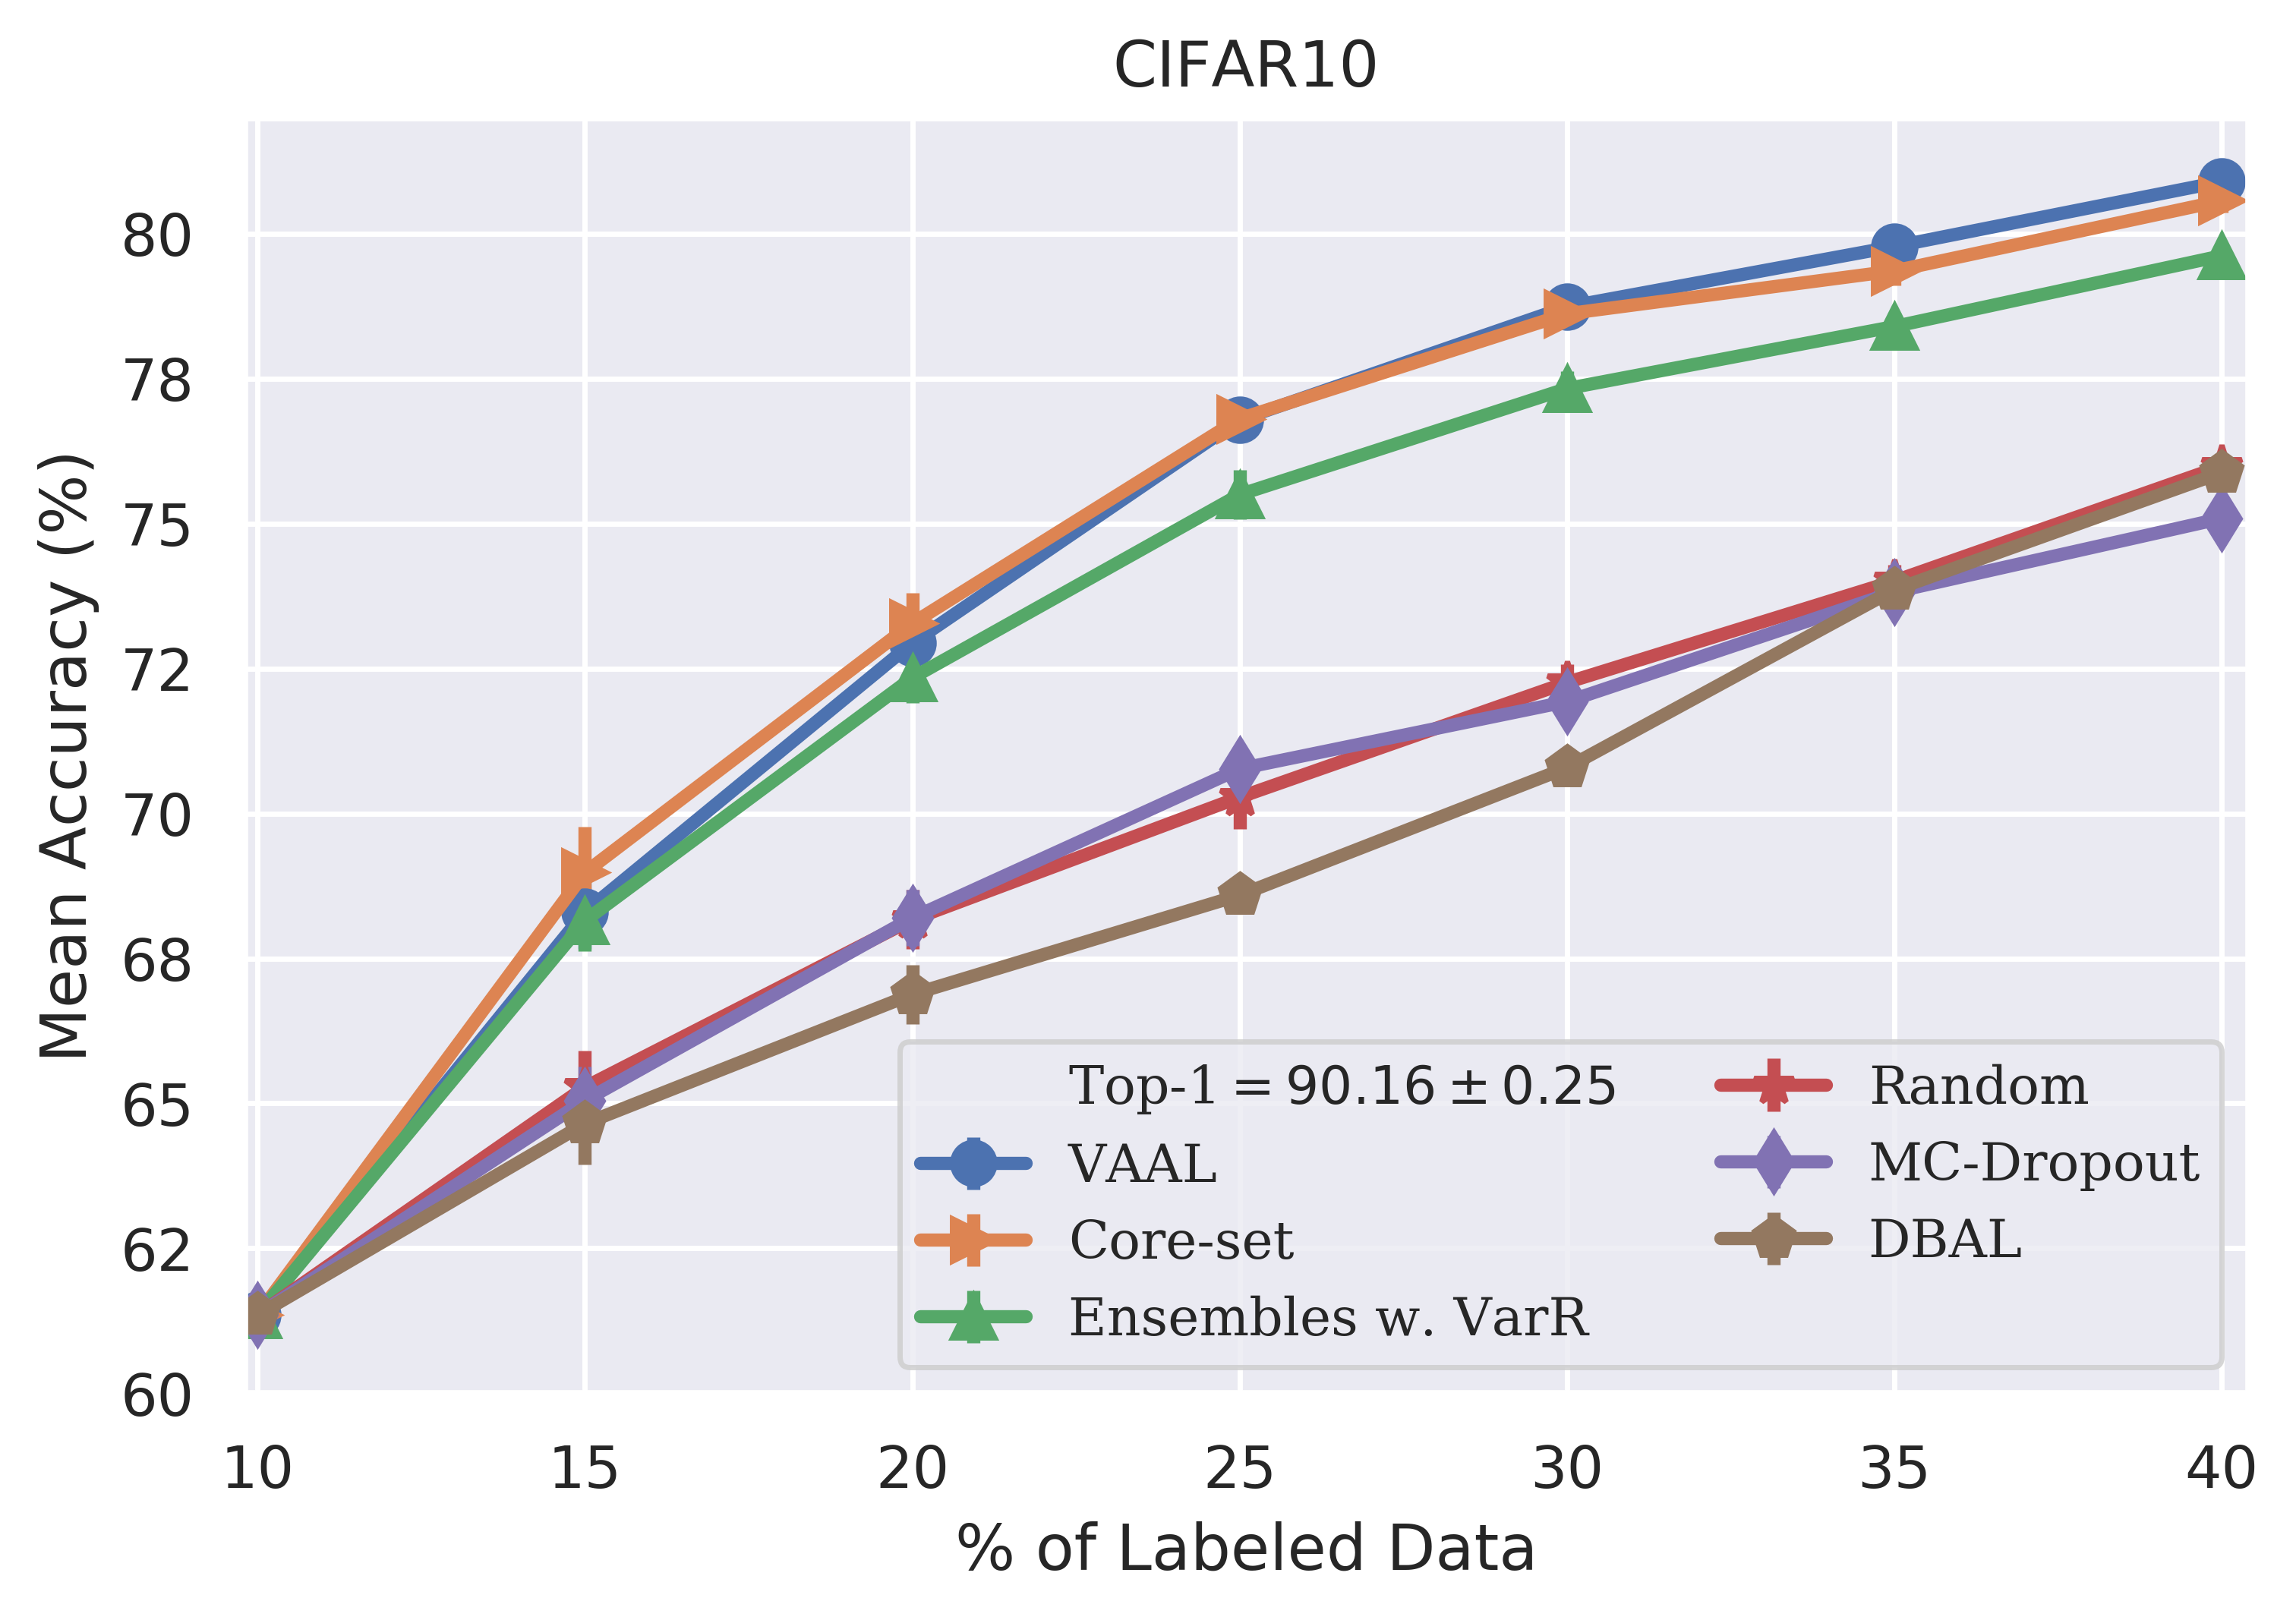

In [3]:
cifar10_ratios = [100.*item for item in [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]]
cifar10_coreset = [61.35, 68.98, 73.28, 76.81, 78.62, 79.36, 80.57]
cifar10_coreset_error = [0, 0.79, 0.53, 0.35, 0.24, 0.25, 0.2]
cifar10_my_method = [61.35, 68.3, 72.94, 76.79, 78.74, 79.78, 80.9]
cifar10_my_method_error = [0, 0.64, 0.33, 0.3, 0.23, 0.2, 0.185]
cifar10_ensemble = [61.35, 68.15, 72.34, 75.5, 77.33, 78.4, 79.62]
cifar10_ensemble_error = [0, 0.53, 0.43, 0.43, 0.295, 0.24, 0.155]
cifar10_dropout = [61.35, 65.05, 68.2, 70.77, 71.93, 73.82, 75.09]
cifar10_dropout_error = [0, 0.58, 0.48, 0.37, 0.235, 0.2, 0.185]
cifar10_random = [61.35, 65.28, 68.17, 70.28, 72.26, 74.01, 75.99]
cifar10_random_error = [0, 0.63, 0.51, 0.55, 0.32, 0.28, 0.21]
cifar10_oracle = [61.35, 65.52, 69.22, 71.82, 74.04, 75.74, 76.84]
cifar10_oracle_error = [0, 0.61, 0.335, 0.3, 0.25, 0.18, 0.16]
cifar10_empirical = [61.35, 64.65, 66.88, 68.59, 70.79, 73.86, 75.88]
cifar10_empirical_error = [0, 0.71, 0.51, 0.33, 0.235, 0.18, 0.16]

fig, ax = plt.subplots(dpi=500)
plt_props()

cifar10_my_method_plot = plt.errorbar(cifar10_ratios, cifar10_my_method, label='VAAL', marker=m['VAAL'] ,yerr=cifar10_my_method_error)
cifar10_coreset_plot = plt.errorbar(cifar10_ratios, cifar10_coreset, label='Core-set', marker=m['Core-set'], yerr=cifar10_coreset_error)
cifar10_ensemble_plot = plt.errorbar(cifar10_ratios, cifar10_ensemble, label='Ensembles w. VarR',marker=m['Ensemble'], yerr=cifar10_ensemble_error)
cifar10_random_plot = plt.errorbar(cifar10_ratios, cifar10_random, label='Random', marker=m['Random'], yerr=cifar10_random_error)
cifar10_dropout_plot = plt.errorbar(cifar10_ratios, cifar10_dropout, label='MC-Dropout', marker=m['Dropout'], yerr=cifar10_dropout_error)
cifar10_empirical_plot = plt.errorbar(cifar10_ratios, cifar10_empirical, label='DBAL', marker=m['DBAL'], yerr=cifar10_empirical_error)

ax.yaxis.set_major_formatter(FormatStrFormatter('%.f'))
plt.legend(handles=[cifar10_random_plot, cifar10_coreset_plot, cifar10_my_method_plot, cifar10_empirical_plot, cifar10_dropout_plot, cifar10_ensemble_plot], loc=4)

ax.set_xlim(9.8, 40.4)
ax.set_ylim(60.0, 82.0)
plt.plot([], [], ' ', label= r"Top-1" 
                            r"$=90.16 \pm 0.25$")
plt.legend(ncol=2, loc='lower right')
fig.tight_layout()
plt.xlabel('% of Labeled Data')
plt.ylabel('Mean Accuracy (%)')  
plt.title('CIFAR10')
plt.grid(True)
plt.show()

### CIFAR 100

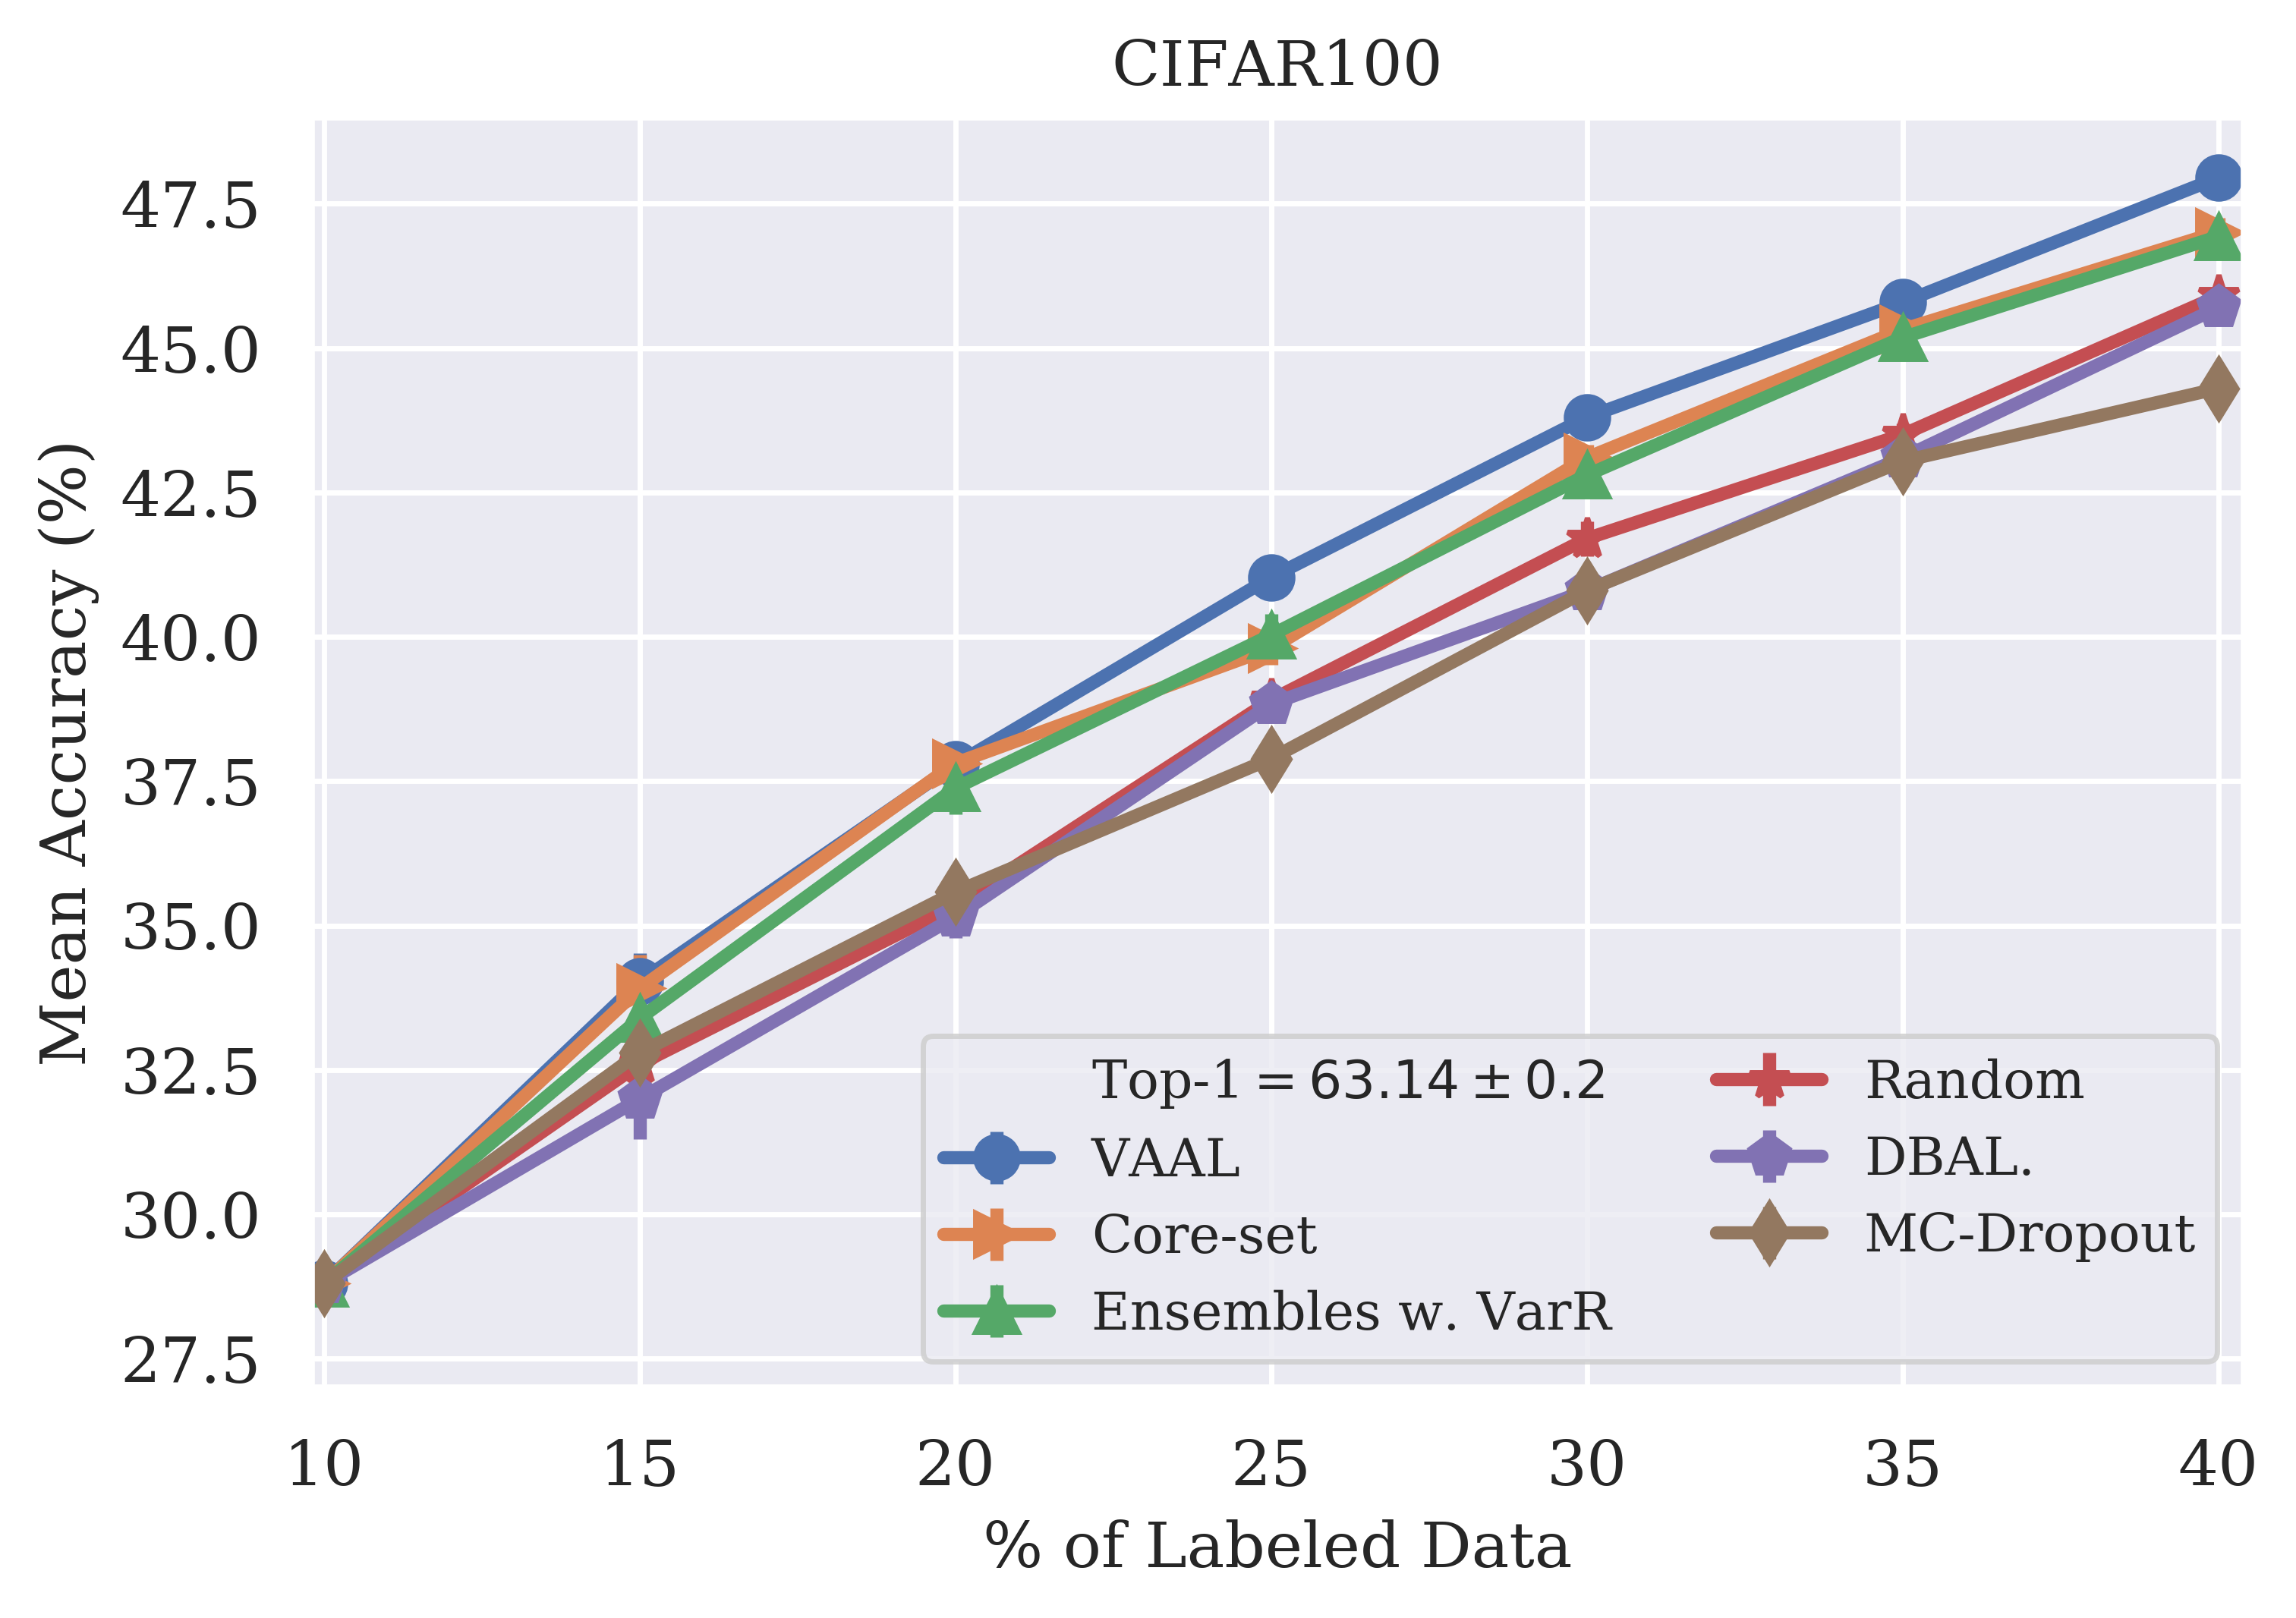

In [4]:
cifar100_ratios=[100.*item for item in [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]]
cifar100_coreset = [28.8, 33.91, 37.81, 39.8, 43.1, 45.32, 47.01]
cifar100_coreset_error = [0, 0.59, 0.25, 0.29, 0.22, 0.18, 0.25]
cifar100_my_method = [28.8, 34.03, 37.79, 41.03, 43.8, 45.79, 47.95]
cifar100_my_method_error = [0, 0.495, 0.28, 0.29, 0.23, 0.19, 0.25]
cifar100_ensemble = [28.8, 33.39, 37.38, 40.03, 42.8, 45.18, 46.93]
cifar100_ensemble_error = [0, 0.54, 0.45, 0.36, 0.28, 0.15, 0.15]
cifar100_dropout = [28.8, 32.8, 35.58, 37.89, 40.8, 43.04, 44.3]
cifar100_dropout_error = [0, 0.51, 0.305, 0.29, 0.22, 0.25, 0.28]
cifar100_random = [28.8, 32.6, 35.35, 38.905, 41.7, 43.5, 45.9]
cifar100_random_error = [0, 0.52, 0.29, 0.22, 0.3, 0.19, 0.13]
cifar100_oracle = [28.8, 33.01, 35.99, 39.49, 42.3, 43.88, 46.12]
cifar100_oracle_error = [0, 0.68, 0.24, 0.32, 0.29, 0.35, 0.22]
cifar100_empirical = [28.8, 32.0, 35.15, 38.835, 40.8, 43.1, 45.7]
cifar100_empirical_error = [0, 0.70, 0.37, 0.33, 0.30, 0.28, 0.205]

fig, ax = plt.subplots(dpi=500)
plt_props()

cifar100_my_method_plot = plt.errorbar(cifar100_ratios, cifar100_my_method, label='VAAL', marker=m['VAAL'], yerr=cifar100_my_method_error)
cifar100_coreset_plot = plt.errorbar(cifar100_ratios, cifar100_coreset, label='Core-set', marker=m['Core-set'], yerr=cifar100_coreset_error)
cifar100_ensemble_plot = plt.errorbar(cifar100_ratios, cifar100_ensemble, label='Ensembles w. VarR', marker=m['Ensemble'], yerr=cifar100_ensemble_error)
cifar100_random_plot = plt.errorbar(cifar100_ratios, cifar100_random, label='Random', marker=m['Random'], yerr=cifar100_random_error)
cifar100_empirical_plot = plt.errorbar(cifar100_ratios, cifar100_empirical, label='DBAL.', marker=m['DBAL'], yerr=cifar100_empirical_error)
cifar100_dropout_plot = plt.errorbar(cifar100_ratios, cifar100_dropout, label='MC-Dropout', marker=m['Dropout'], yerr=cifar100_dropout_error)
plt.legend(handles=[cifar100_random_plot, cifar100_dropout_plot, cifar100_empirical_plot, cifar100_ensemble_plot, cifar100_coreset_plot, cifar100_my_method_plot])

ax.set_ylim(27.0, 49.0)
ax.set_xlim(9.8, 40.4)
plt.plot([], [], ' ', label= r"Top-1" 
                            r"$=63.14 \pm 0.2$")
plt.legend(ncol=2, loc='lower right')
fig.tight_layout()

plt.xlabel('% of Labeled Data')
plt.ylabel('Mean Accuracy (%)')  
plt.title('CIFAR100')
plt.grid(True)
plt.show()

### Caltech-256

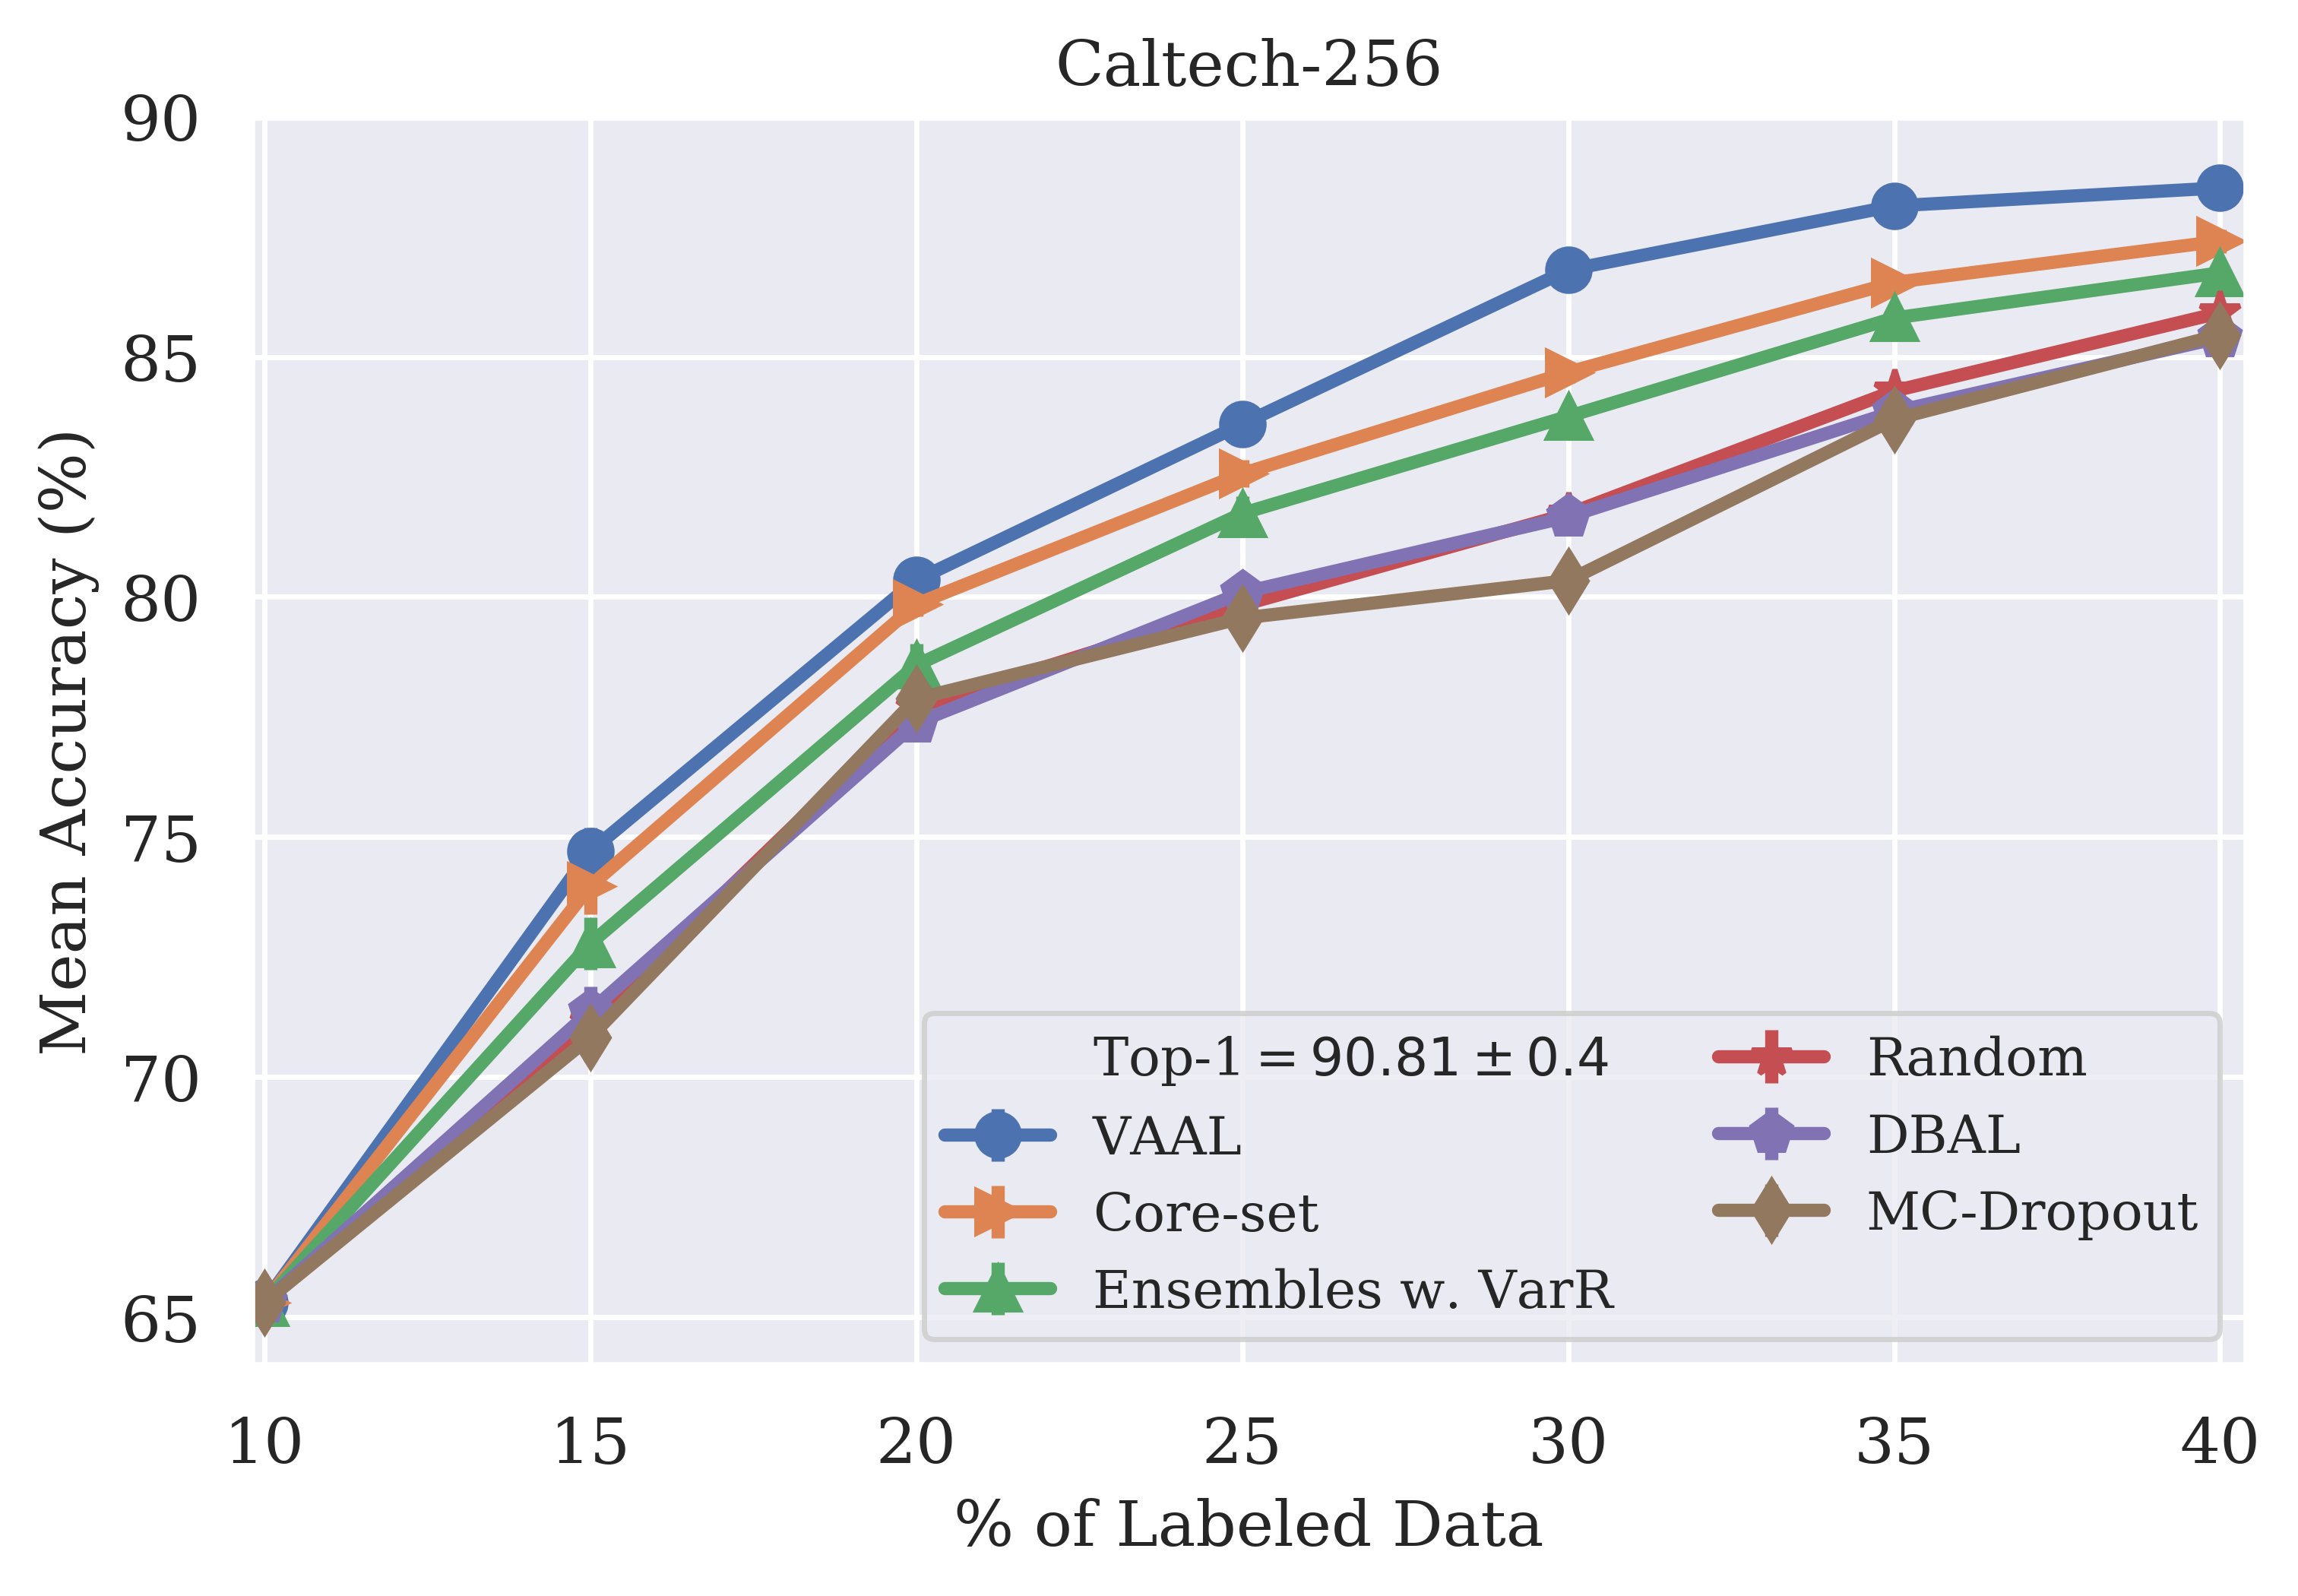

In [5]:
caltech_256_ratios = [100.*item for item in [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]]
caltech_256_coreset = [65.3, 73.98, 79.85, 82.57, 84.68, 86.55, 87.41]
caltech_256_coreset_error = [0, 0.39, 0.3, 0.28, 0.22, 0.13, 0.18]
caltech_256_my_method = [65.3, 74.7, 80.35, 83.6, 86.81, 88.145, 88.52]
caltech_256_my_method_error = [0, 0.55, 0.43, 0.38, 0.25, 0.15, 0.11]
caltech_256_ensemble = [65.3, 72.78, 78.58, 81.74, 83.76, 85.81, 86.75]
caltech_256_ensemble_error = [0, 0.53, 0.35, 0.25, 0.28, 0.22, 0.19]
caltech_256_dropout = [65.3, 70.83, 77.88, 79.56, 80.34, 83.7, 85.46]
caltech_256_dropout_error = [0, 0.7, 0.4, 0.3, 0.25, 0.22, 0.18]
caltech_256_random = [65.3, 71.14, 77.7, 79.83, 81.73, 84.29, 85.92]
caltech_256_random_error = [0, 0.45, 0.35, 0.22, 0.2, 0.15, 0.115]
caltech_256_oracle = [65.3, 71.92, 78.39, 80.58, 82.49, 85.02, 86.54]
caltech_256_oracle_error = [0, 0.64, 0.42, 0.35, 0.22, 0.18, 0.15]
caltech_256_empirical = [65.3, 71.37, 77.38, 80.09, 81.67, 83.86, 85.4]
caltech_256_empirical_error = [0, 0.68, 0.4, 0.35, 0.26, 0.245, 0.18]

fig, ax = plt.subplots(dpi=500)
plt_props()

caltech_256_my_method_plot = plt.errorbar(caltech_256_ratios, caltech_256_my_method, label='VAAL', marker=m['VAAL'], yerr=cifar100_my_method_error)
caltech_256_coreset_plot = plt.errorbar(caltech_256_ratios, caltech_256_coreset, label='Core-set', marker=m['Core-set'], yerr=cifar100_coreset_error)
caltech_256_ensemble_plot = plt.errorbar(caltech_256_ratios, caltech_256_ensemble, label='Ensembles w. VarR', marker=m['Ensemble'], yerr=cifar100_ensemble_error)
caltech_256_random_plot = plt.errorbar(caltech_256_ratios, caltech_256_random, label='Random', marker=m['Random'], yerr=cifar100_random_error)
caltech_256_empirical_plot = plt.errorbar(caltech_256_ratios, caltech_256_empirical, label='DBAL', marker=m['DBAL'], yerr=cifar100_dropout_error)
caltech_256_dropout_plot = plt.errorbar(caltech_256_ratios, caltech_256_dropout, label='MC-Dropout', marker=m['Dropout'], yerr=cifar100_dropout_error)

ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.legend(handles=[caltech_256_random_plot, caltech_256_dropout_plot, caltech_256_ensemble_plot, caltech_256_coreset_plot, caltech_256_my_method_plot, caltech_256_empirical_plot])

ax.set_ylim(64.0, 90.0)
ax.set_xlim(9.8, 40.4)
plt.plot([], [], ' ', label= r"Top-1" 
                            r"$= 90.81 \pm 0.4$")
plt.legend(ncol=2, loc='lower right')
fig.tight_layout()

plt.xlabel('% of Labeled Data')
plt.ylabel('Mean Accuracy (%)')  
plt.title('Caltech-256')
plt.grid(True)
plt.show()

# Semantic segmentation results:

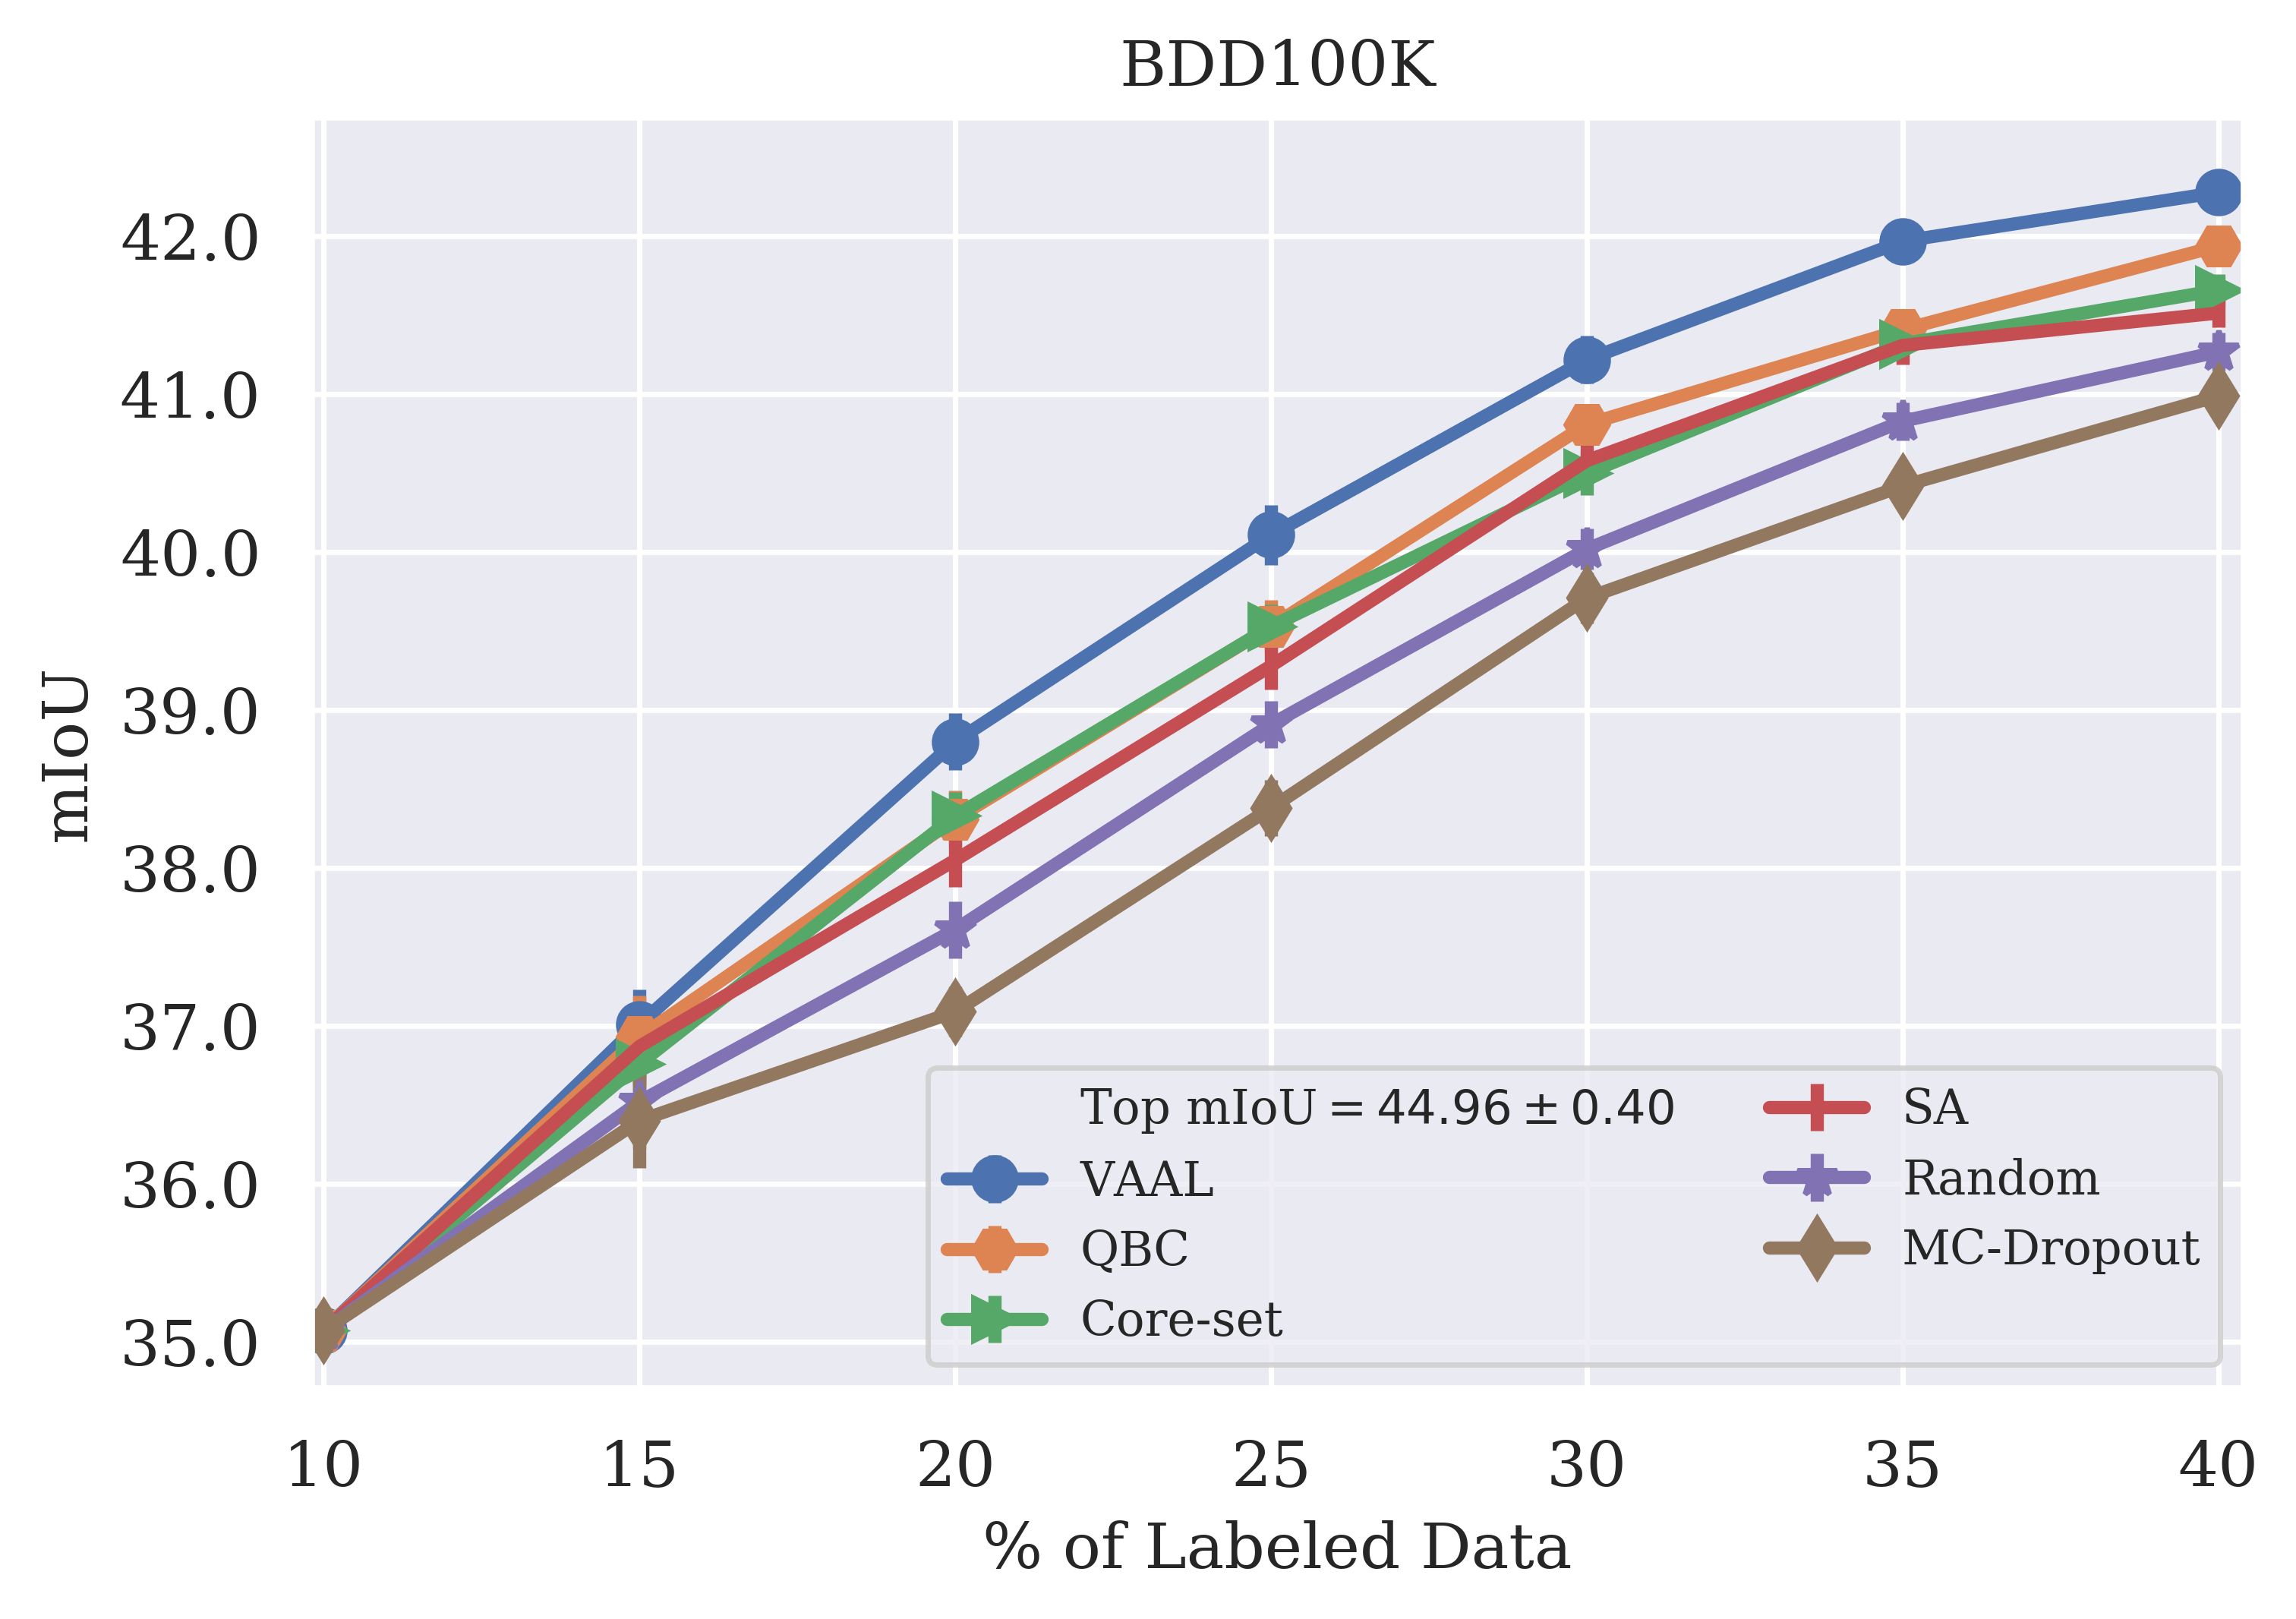

In [6]:
bdd_ratios = [100.*item for item in [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]]
bdd_qbc_combo = [35.07, 36.87, 38.05, 39.28, 40.58, 41.31, 41.515]
bdd_qbc_combo_err = [0., 0.25, 0.17, 0.15, 0.14, 0.12, 0.09]
bdd_coreset = [35.07, 36.76, 38.33, 39.53, 40.5, 41.32, 41.66]
bdd_coreset_err = [0., 0.2, 0.15, 0.14, 0.14, 0.12, 0.1]
bdd_qbc = [35.07, 36.93, 38.31, 39.53, 40.81, 41.41, 41.94]
bdd_qbc_err = [0., 0.26, 0.18, 0.17, 0.13, 0.09, 0.1]
bdd_our = [35.07, 37.01, 38.8, 40.11, 41.22, 41.97, 42.28]
bdd_our_err = [0., 0.22, 0.18, 0.19, 0.15, 0.13, 0.11]
bdd_random = [35.07, 36.52, 37.61, 38.91, 40.02, 40.83, 41.27]
bdd_random_err = [0., 0.3, 0.18, 0.15, 0.13, 0.12, 0.12]
bdd_dropout = [35.07, 36.4, 37.09, 38.38, 39.71, 40.42, 40.99]
bdd_dropout_err = [0., 0.3, 0.16, 0.18, 0.16, 0.15, 0.11]

fig, ax = plt.subplots(dpi=500)
plt_props()

bdd_our_plot = plt.errorbar(bdd_ratios, bdd_our, label='VAAL', marker=m['VAAL'], yerr=bdd_our_err)
bdd_qbc_plot = plt.errorbar(bdd_ratios, bdd_qbc, label='QBC', marker=m['QBC'], yerr=bdd_qbc_err)
bdd_coreset_plot = plt.errorbar(bdd_ratios, bdd_coreset, label='Core-set', marker=m['Core-set'], yerr=bdd_coreset_err)
bdd_qbc_combo_plot = plt.errorbar(bdd_ratios, bdd_qbc_combo, label='SA', marker=m['SA'], yerr=bdd_qbc_combo_err)
bdd_random_plot = plt.errorbar(bdd_ratios, bdd_random, label='Random', marker=m['Random'], yerr=bdd_random_err)
bdd_dropout_plot = plt.errorbar(bdd_ratios, bdd_dropout, label='MC-Dropout', marker=m['Dropout'], yerr=bdd_dropout_err)

ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.rcParams['legend.fontsize'] = 9
plt.legend(handles=[bdd_coreset_plot, bdd_dropout_plot, bdd_random_plot, bdd_our_plot, bdd_qbc_plot, bdd_qbc_combo_plot])
ax.set_xlim(9.8, 40.4)
plt.plot([], [], ' ', label= r"Top mIoU" 
                            r"$=44.96 \pm 0.40$")
plt.legend(ncol=2, loc='lower right')
fig.tight_layout()

plt.xlabel('% of Labeled Data') 
plt.ylabel('mIoU')
plt.title('BDD100K')
plt.grid(True)
plt.show()

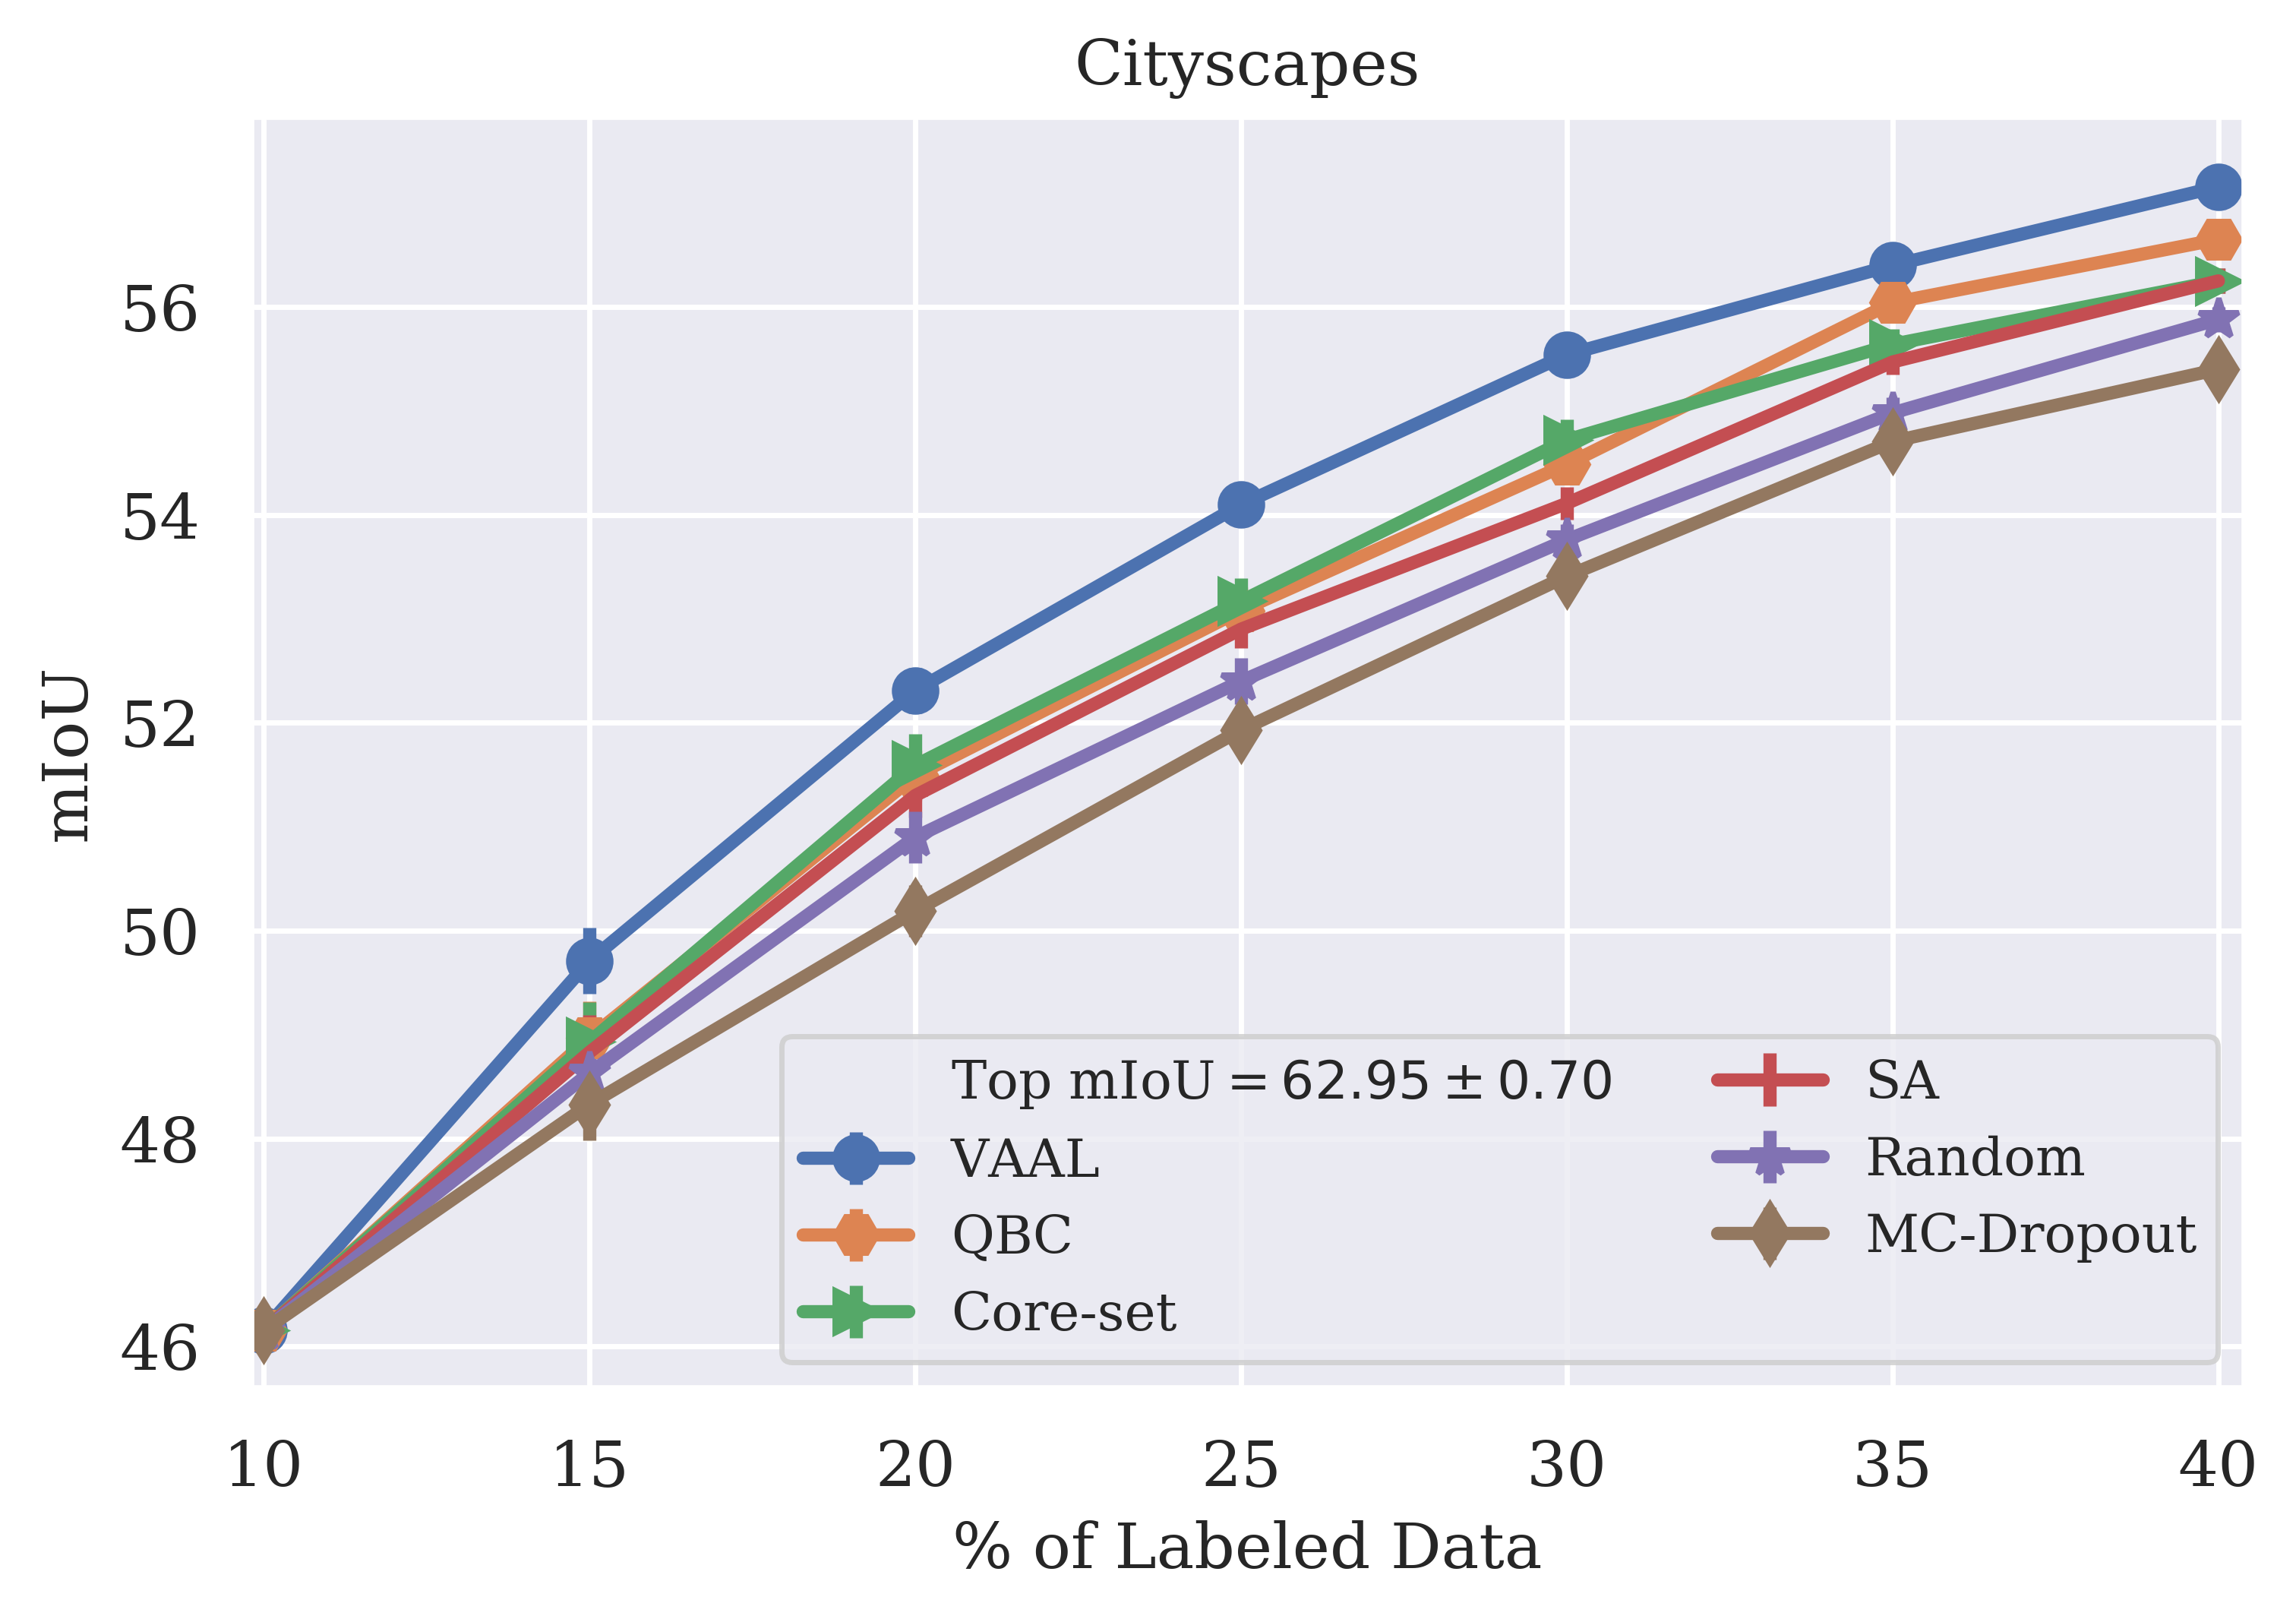

In [7]:
city_ratios = [100.*item for item in [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]]
city_dropout = [46.15486, 48.33, 50.19, 51.93, 53.41, 54.7054, 55.40]
city_dropout_error = [0, 0.35, 0.25, 0.18, 0.19, 0.14, 0.11]
city_random = [46.15486, 48.63, 50.9, 52.4, 53.76, 54.98, 55.88,]
city_random_error = [0, 0.35, 0.25, 0.22, 0.15, 0.15, 0.12]
city_vae = [46.15486, 49.71, 52.31, 54.098, 55.54, 56.4, 57.156]
city_vae_error = [0, 0.32, 0.22, 0.21, 0.18, 0.15, 0.12]
city_ensemble = [46.15486, 48.97, 51.49, 53.08, 54.485, 56.04, 56.65]
city_ensemble_error = [0, 0.35, 0.24, 0.22, 0.18, 0.14, 0.12]
city_coreset = [46.15486, 48.93, 51.59, 53.17, 54.72, 55.64, 56.25]
city_coreset_error = [0, 0.38, 0.3, 0.22, 0.2, 0.15, 0.12]
city_qbc_coreset = [46.15486, 48.83, 51.3, 52.9, 54.11, 55.47, 56.25]
city_qbc_coreset_error = [0, 0.36, 0.21, 0.18, 0.16, 0.12, 0.12]

fig, ax = plt.subplots(dpi=500)
plt_props()

city_vae_plot = plt.errorbar(city_ratios, city_vae, label='VAAL', marker=m['VAAL'], yerr=city_vae_error)
city_ensemble_plot = plt.errorbar(city_ratios, city_ensemble, label='QBC', marker=m['QBC'], yerr=city_ensemble_error)
city_coreset_plot = plt.errorbar(city_ratios, city_coreset, label='Core-set', marker=m['Core-set'], yerr=city_coreset_error)
city_qbc_coreset_plot = plt.errorbar(city_ratios, city_qbc_coreset, label='SA', marker=m['SA'], yerr=city_qbc_coreset_error)
city_random_plot = plt.errorbar(city_ratios, city_random, label='Random', marker=m['Random'], yerr=city_random_error) 
city_dropout_plot = plt.errorbar(city_ratios, city_dropout, label='MC-Dropout', marker=m['Dropout'], yerr=city_dropout_error)

ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.legend(handles=[city_vae_plot, city_coreset_plot, city_dropout_plot, city_random_plot, city_ensemble_plot, city_qbc_coreset_plot,])
# ax.set_xlim(0.098, 0.404)
ax.set_xlim(9.8, 40.4)
plt.plot([], [], ' ', label= r"Top mIoU" 
                            r"$= 62.95 \pm 0.70$")
plt.legend(ncol=2, loc='lower right')
fig.tight_layout()

plt.xlabel('% of Labeled Data') 
plt.ylabel('mIoU')
plt.title('Cityscapes')
plt.grid(True)
plt.show()

In [8]:
path_builder = lambda x: os.path.join('./imagenet_results', x)
init_data = np.load(path_builder('init_imagenet.npy'))
coreset_data = np.load(path_builder('coreset_imagenet.npy'))
ens_data = np.load(path_builder('ens_imagenet.npy'))
dropout_data = np.load(path_builder('dropout_imagenet.npy'))
emp_data = np.load(path_builder('emp_imagenet.npy'))
rand_data = np.load(path_builder('rand_imagenet.npy'))
oracle_data = np.load(path_builder('oracle_imagenet.npy'))
our_data = np.load(path_builder('our_imagenet.npy'))

In [9]:
init = np.mean(init_data)
init_std = np.std(init_data)
imagenet_ratios=100.*np.arange(0.1,0.35,0.05)
coreset_mean = [init, *np.mean(coreset_data, axis=0)]
coreset_error = [init_std, *np.std(coreset_data, axis=0)]
emp_mean = [init, *np.mean(emp_data, axis=0)]
emp_error = [init_std, *np.std(emp_data, axis=0)]
ens_mean = [init, *np.mean(ens_data, axis=0)]
ens_error = [init_std, *np.std(ens_data, axis=0)]
dropout_mean = [init, *np.mean(dropout_data, axis=0)]
dropout_error = [init_std, *np.std(dropout_data, axis=0)]
rand_mean = [init, *np.mean(rand_data, axis=0)]
rand_error = [init_std, *np.std(rand_data, axis=0)]
oracle_mean = [init, *np.mean(oracle_data, axis=0)]
oracle_error = [init_std, *np.std(oracle_data, axis=0)]
our_mean = [init, *np.mean(our_data, axis=0)]
our_error = [init_std, *np.std(our_data, axis=0)]

coreset_mean = [item*100 for item in coreset_mean]
coreset_error = [item*100 for item in coreset_error]
emp_mean= [item*100 for item in emp_mean]
emp_error= [item*100 for item in emp_error]
ens_mean = [item*100 for item in ens_mean]
ens_error = [item*100 for item in ens_error]
dropout_mean = [item*100 for item in dropout_mean]
dropout_error = [item*100 for item in dropout_error]
rand_mean =  [item*100 for item in rand_mean]
rand_error = [item*100 for item in rand_error]
oracle_mean = [item*100 for item in oracle_mean]
oracle_error = [item*100 for item in oracle_error]
our_mean = [item*100 for item in our_mean]
our_error = [item*100 for item in our_error]

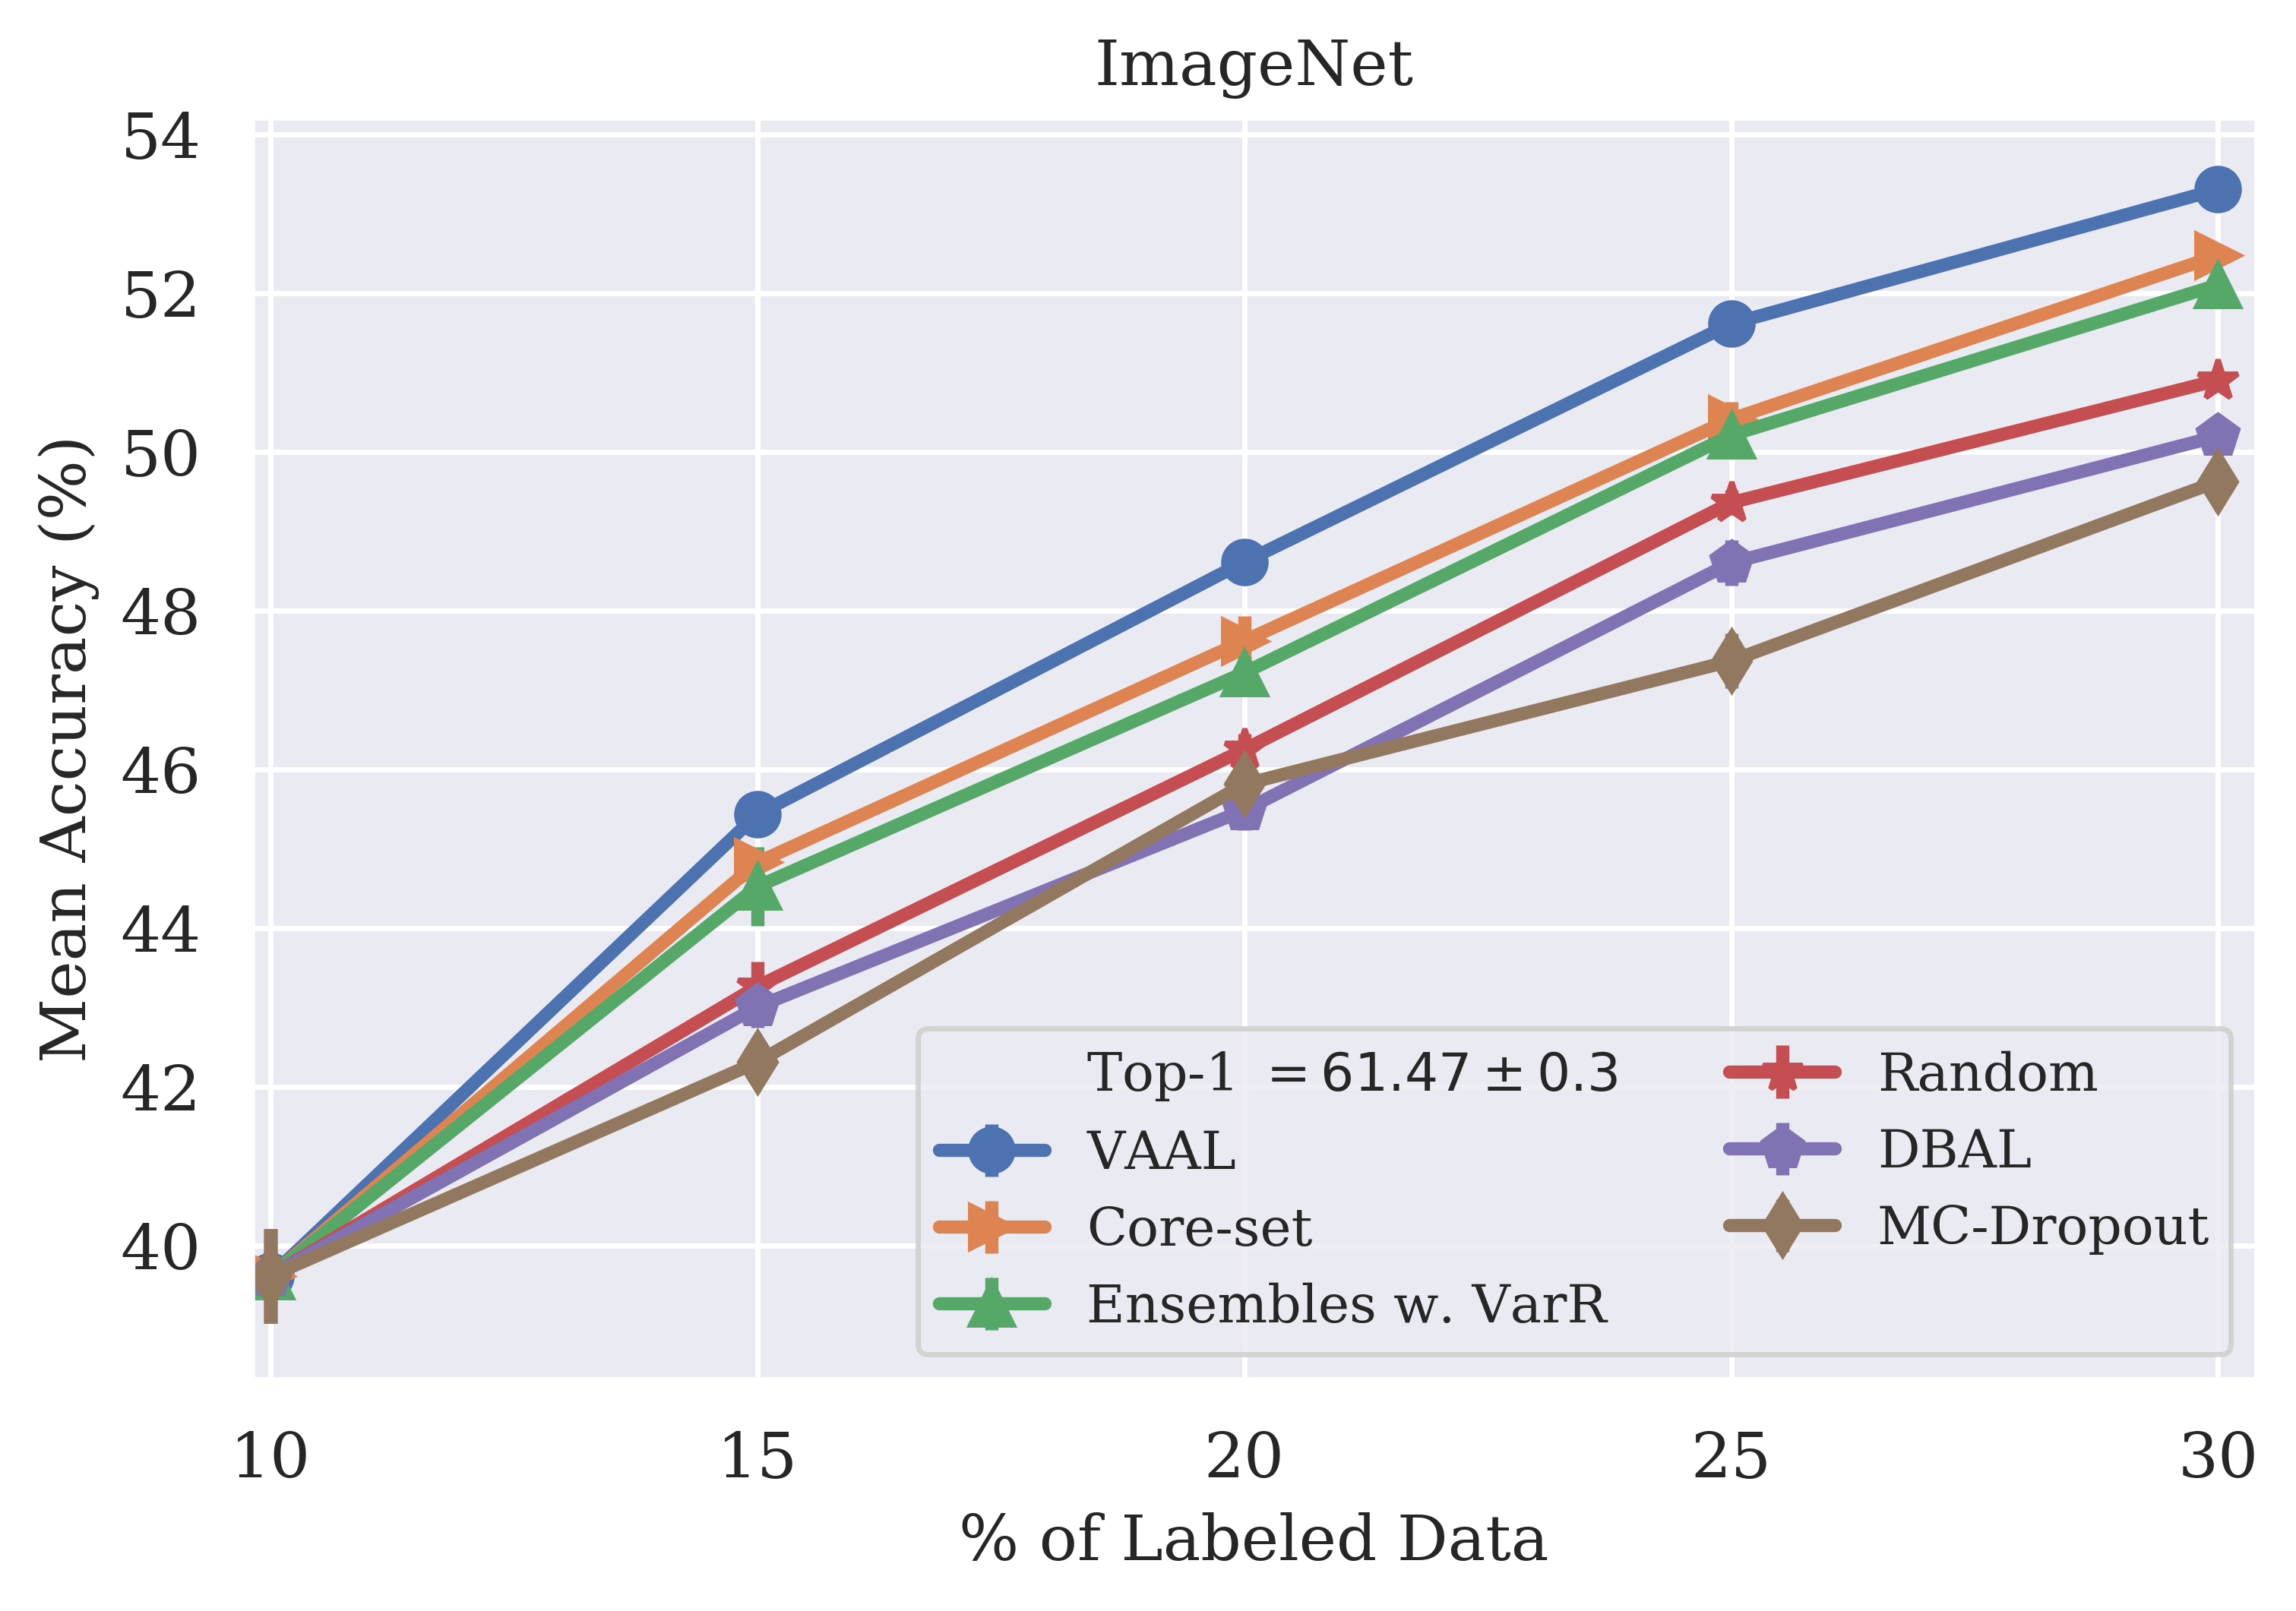

In [10]:
import matplotlib.ticker as ticker
plt_props()
fig, ax = plt.subplots(dpi=500)
my_method_plot = plt.errorbar(imagenet_ratios, our_mean, label='VAAL', marker=m['VAAL'], yerr=our_error)
coreset_plot = plt.errorbar(imagenet_ratios, coreset_mean, label='Core-set', marker=m['Core-set'], yerr=coreset_error)
ensemble_plot = plt.errorbar(imagenet_ratios, ens_mean, label='Ensembles w. VarR ', marker=m['Ensemble'], yerr=ens_error)
# oracle_plot = plt.errorbar(imagenet_ratios, oracle_mean, label='Oracle', yerr=oracle_error)
random_plot = plt.errorbar(imagenet_ratios, rand_mean, label='Random', marker=m['Random'], yerr=rand_error)
empirical_plot = plt.errorbar(imagenet_ratios, emp_mean, label='DBAL', marker=m['DBAL'], yerr=emp_error)
dropout_plot = plt.errorbar(imagenet_ratios, dropout_mean, label='MC-Dropout', marker=m['Dropout'], yerr=dropout_error)


ax.xaxis.set_ticks(imagenet_ratios)
plt.legend(handles=[random_plot, dropout_plot, ensemble_plot, coreset_plot, my_method_plot, empirical_plot])
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set_xlim(9.8, 30.4)
plt.plot([], [], ' ', label= r"Top-1 " 
                            r"$= 61.47 \pm 0.3$")
plt.legend(ncol=2, loc='lower right')
fig.tight_layout()

plt.xlabel('% of Labeled Data')
plt.ylabel('Mean Accuracy (%)')
plt.title('ImageNet')
plt.grid(True)
plt.show()

In [11]:
def eval_classification(vaal,coreset,ens,oracle,rand,emp,dr,size):
    print ()
    print ("VAAL:     ", vaal)
    print ("CORE_SET: ", coreset)
    print ("RANDOM:   ", rand)
    print ()
    print ("DIFF VAAL_CORESET:   %.2f" % np.mean((np.array(vaal)-np.array(coreset))))
    print ("DIFF VAAL_ENSEMBLES: %.2f" %  np.mean((np.array(vaal)-np.array(ens))))
    print ("DIFF ORACLE:         %.2f" %  np.mean((np.array(vaal)-np.array(oracle))))
    print ("DIFF VAAL_RANDOM:    %.2f" %  np.mean((np.array(vaal)-np.array(rand))))
    print ("DIFF VAAL_EMPUNC:    %.2f" %  np.mean((np.array(vaal)-np.array(emp))))
    print ("DIFF VAAL_DROPOUT:   %.2f" %  np.mean((np.array(vaal)-np.array(dr))))


In [12]:
def eval_segmentation(vaal,qbc,coreset,sa,rand,dr,size):

    print ()
    print ("VAAL:     ", vaal)
    print ("CORE_SET: ", coreset)
    print ("RANDOM:   ", rand)
    print ()
    print ("DIFF QBC:            %.2f" %  np.mean((np.array(vaal)-np.array(qbc))))    
    print ("DIFF VAAL_CORESET:   %.2f" % np.mean((np.array(vaal)-np.array(coreset))))
    print ("DIFF VAAL_SA    :    %.2f" %  np.mean((np.array(vaal)-np.array(sa))))
    print ("DIFF VAAL_RANDOM:    %.2f" %  np.mean((np.array(vaal)-np.array(rand))))
    print ("DIFF VAAL_DROPOUT:   %.2f" %  np.mean((np.array(vaal)-np.array(dr))))

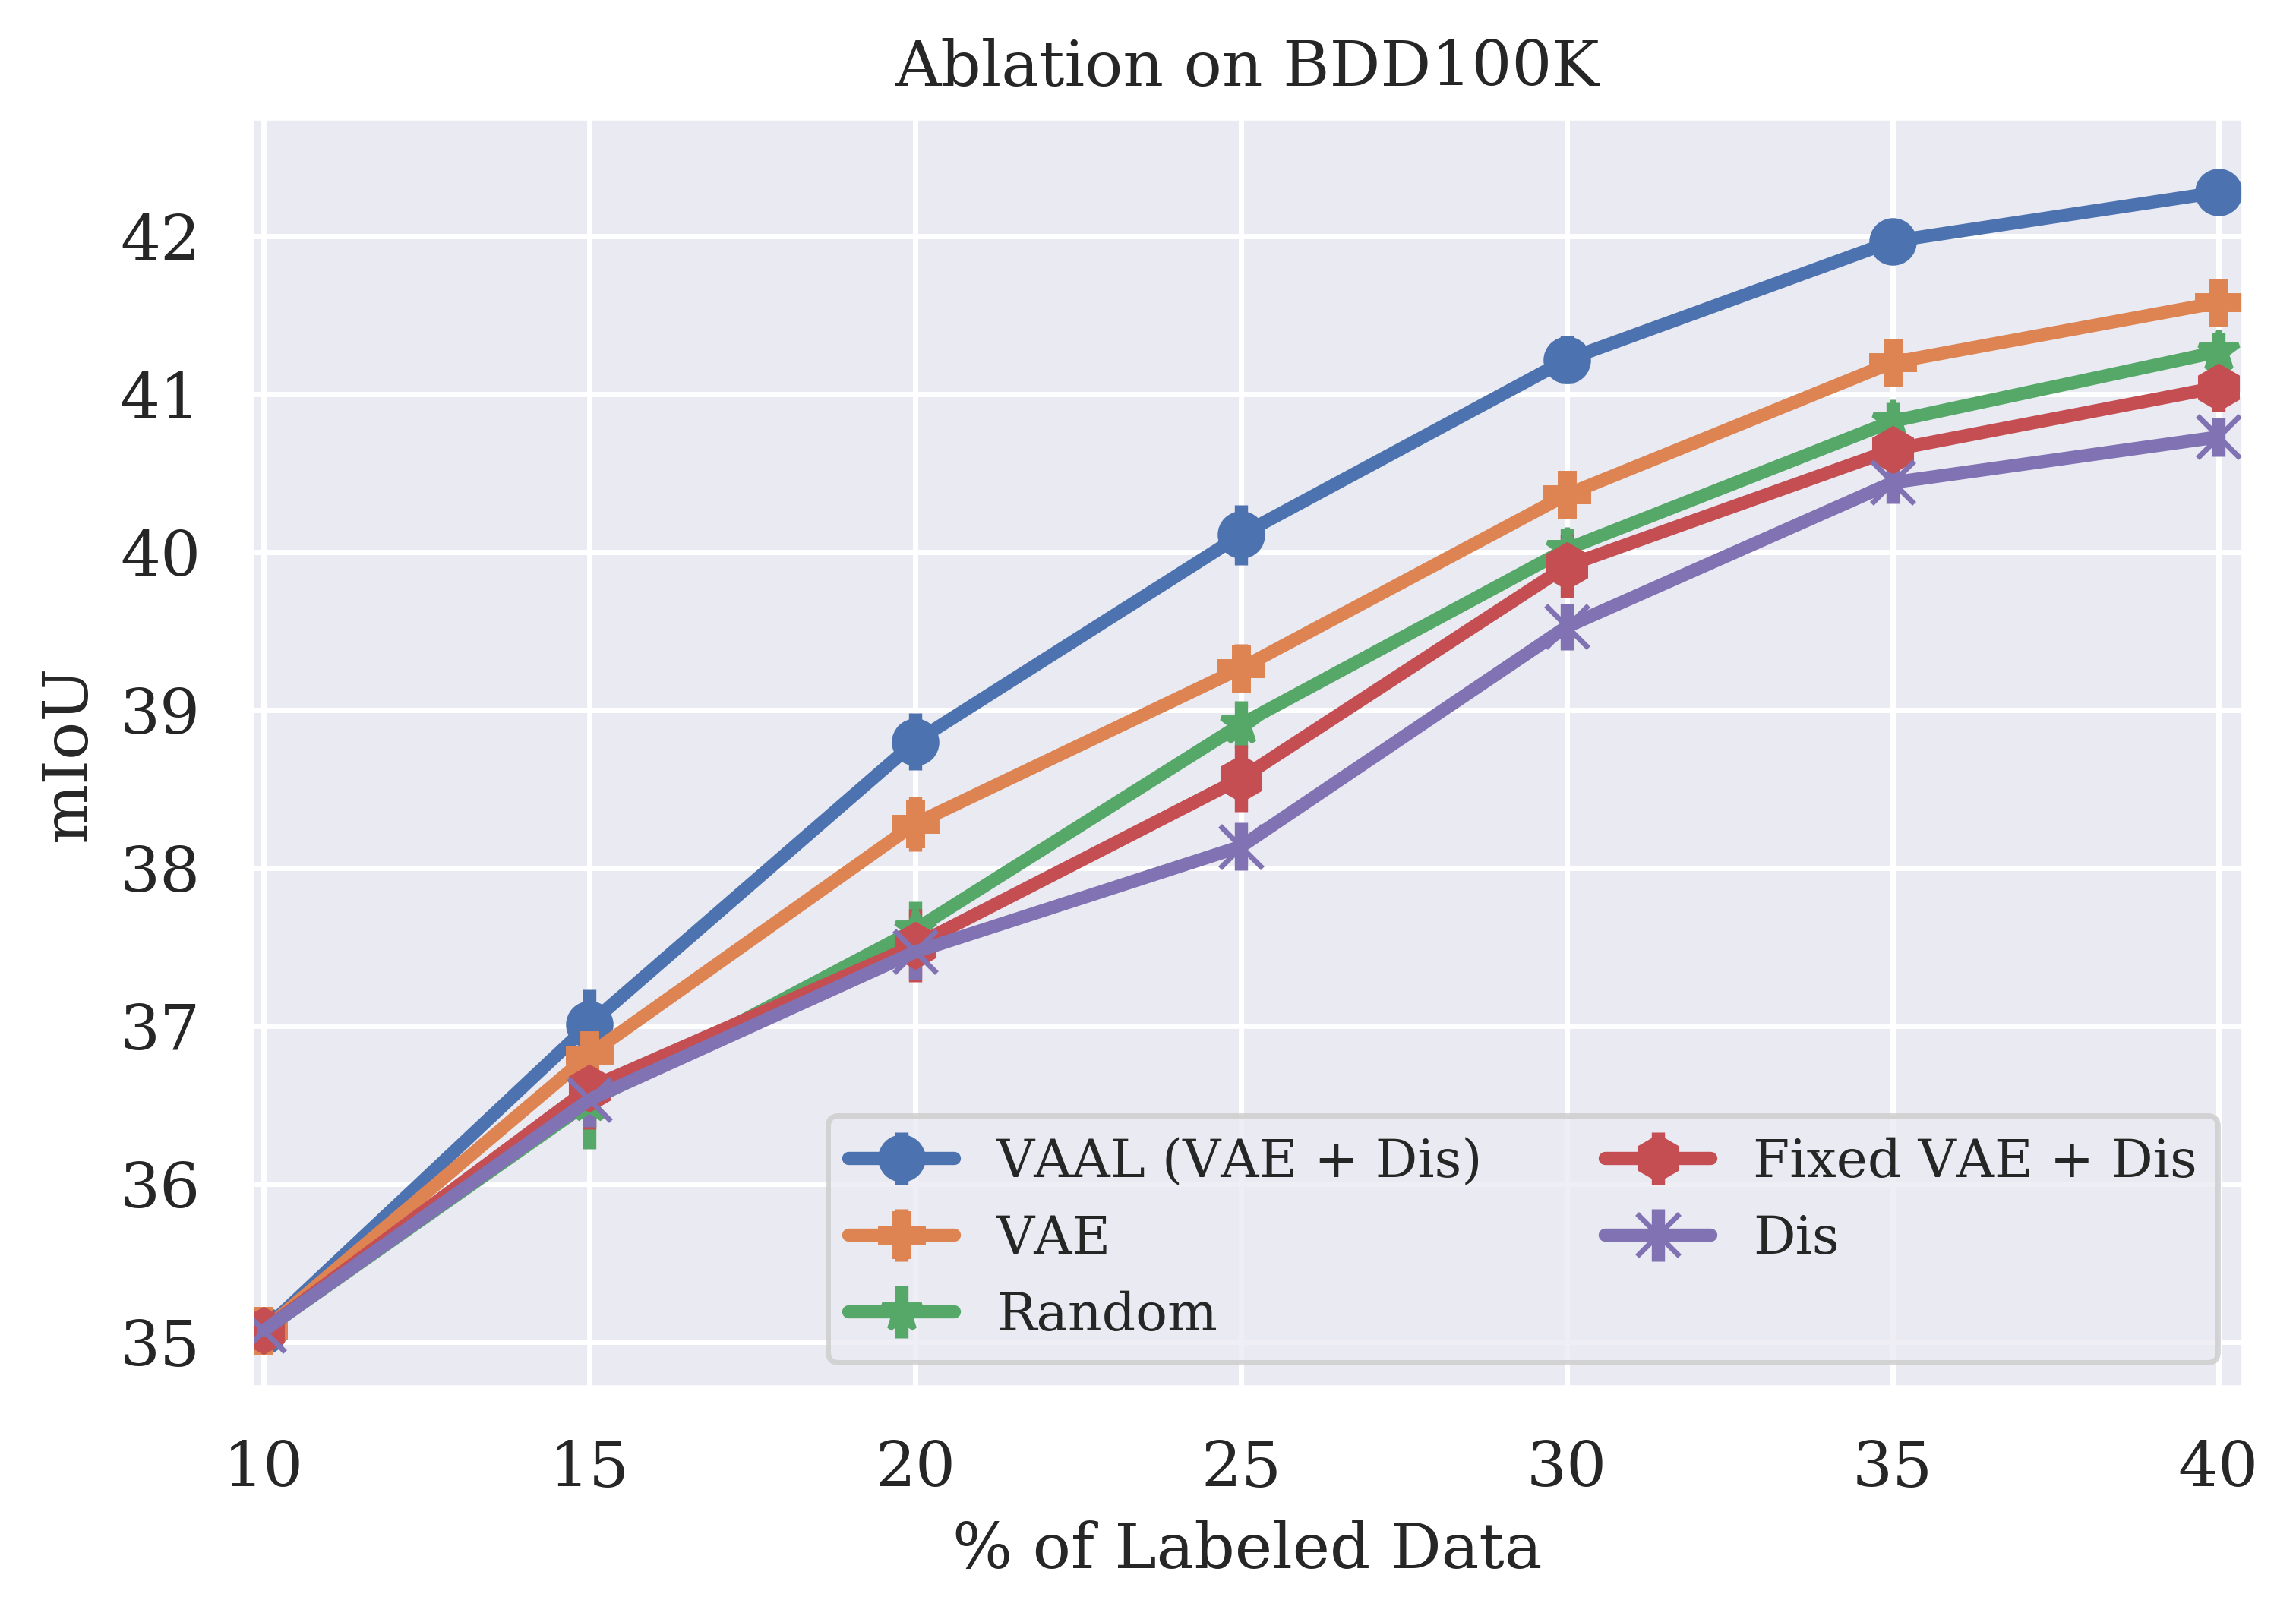

In [13]:
bdd_ratios = [100.*item for item in [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]]

bdd_our = [35.07, 37.01, 38.8, 40.11, 41.22, 41.97, 42.28]
bdd_our_err = [0., 0.22, 0.18, 0.19, 0.15, 0.13, 0.11]
bdd_random = [35.07, 36.52, 37.61, 38.91, 40.02, 40.83, 41.27]
bdd_random_err = [0., 0.3, 0.18, 0.15, 0.13, 0.12, 0.12]
bdd_random_vae = [35.07, 36.6066371, 37.5100131, 38.5673142, 39.9131341, 40.6493281, 41.0448195]
bdd_random_vae_err = [0, 0.26135, 0.22932, 0.21091, 0.200647, 0.191835, 0.15235]
bdd_only_adv = [35.07, 36.5324373, 37.46864135, 38.136139, 39.5284512, 40.4413591, 40.7298381]
bdd_only_adv_err = [0, 0.171035, 0.17382, 0.15239, 0.147783, 0.133845, 0.12128]
bdd_no_adv = [35.07, 36.8184921, 38.2806365, 39.2653123, 40.3649291, 41.2021568, 41.5813563]
bdd_no_adv_err = [0, 0.22382, 0.21948, 0.18802, 0.16381, 0.14285, 0.14184]

fig, ax = plt.subplots(dpi=500)
bdd_our_plot = plt.errorbar(bdd_ratios, bdd_our, label='VAAL (VAE + Dis) ', marker=m['VAAL'], yerr=bdd_our_err)
bdd_no_adv_plot = plt.errorbar(bdd_ratios, bdd_no_adv, label='VAE ', marker='P', yerr=bdd_only_adv_err)
bdd_random_plot = plt.errorbar(bdd_ratios, bdd_random, label='Random', marker=m['Random'], yerr=bdd_random_err)
bdd_random_vae_plot = plt.errorbar(bdd_ratios, bdd_random_vae, label='Fixed VAE + Dis', marker='h', yerr=bdd_random_vae_err)
bdd_only_adv_plot = plt.errorbar(bdd_ratios, bdd_only_adv, label='Dis', marker='x', yerr=bdd_only_adv_err)



plt_props()
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.legend(handles=[bdd_our_plot, bdd_no_adv_plot, bdd_only_adv_plot, bdd_random_vae_plot, bdd_random_plot])
ax.set_xlim(9.8, 40.4)
#plt.plot([], [], ' ', label= r"Top mIoU" 
#                            r"$=44.96 \pm 0.00$")
plt.legend(ncol=2, loc='lower right')
fig.tight_layout()

plt.xlabel('% of Labeled Data') 
plt.ylabel('mIoU')
plt.title('Ablation on BDD100K')
plt.grid(True)
plt.show()

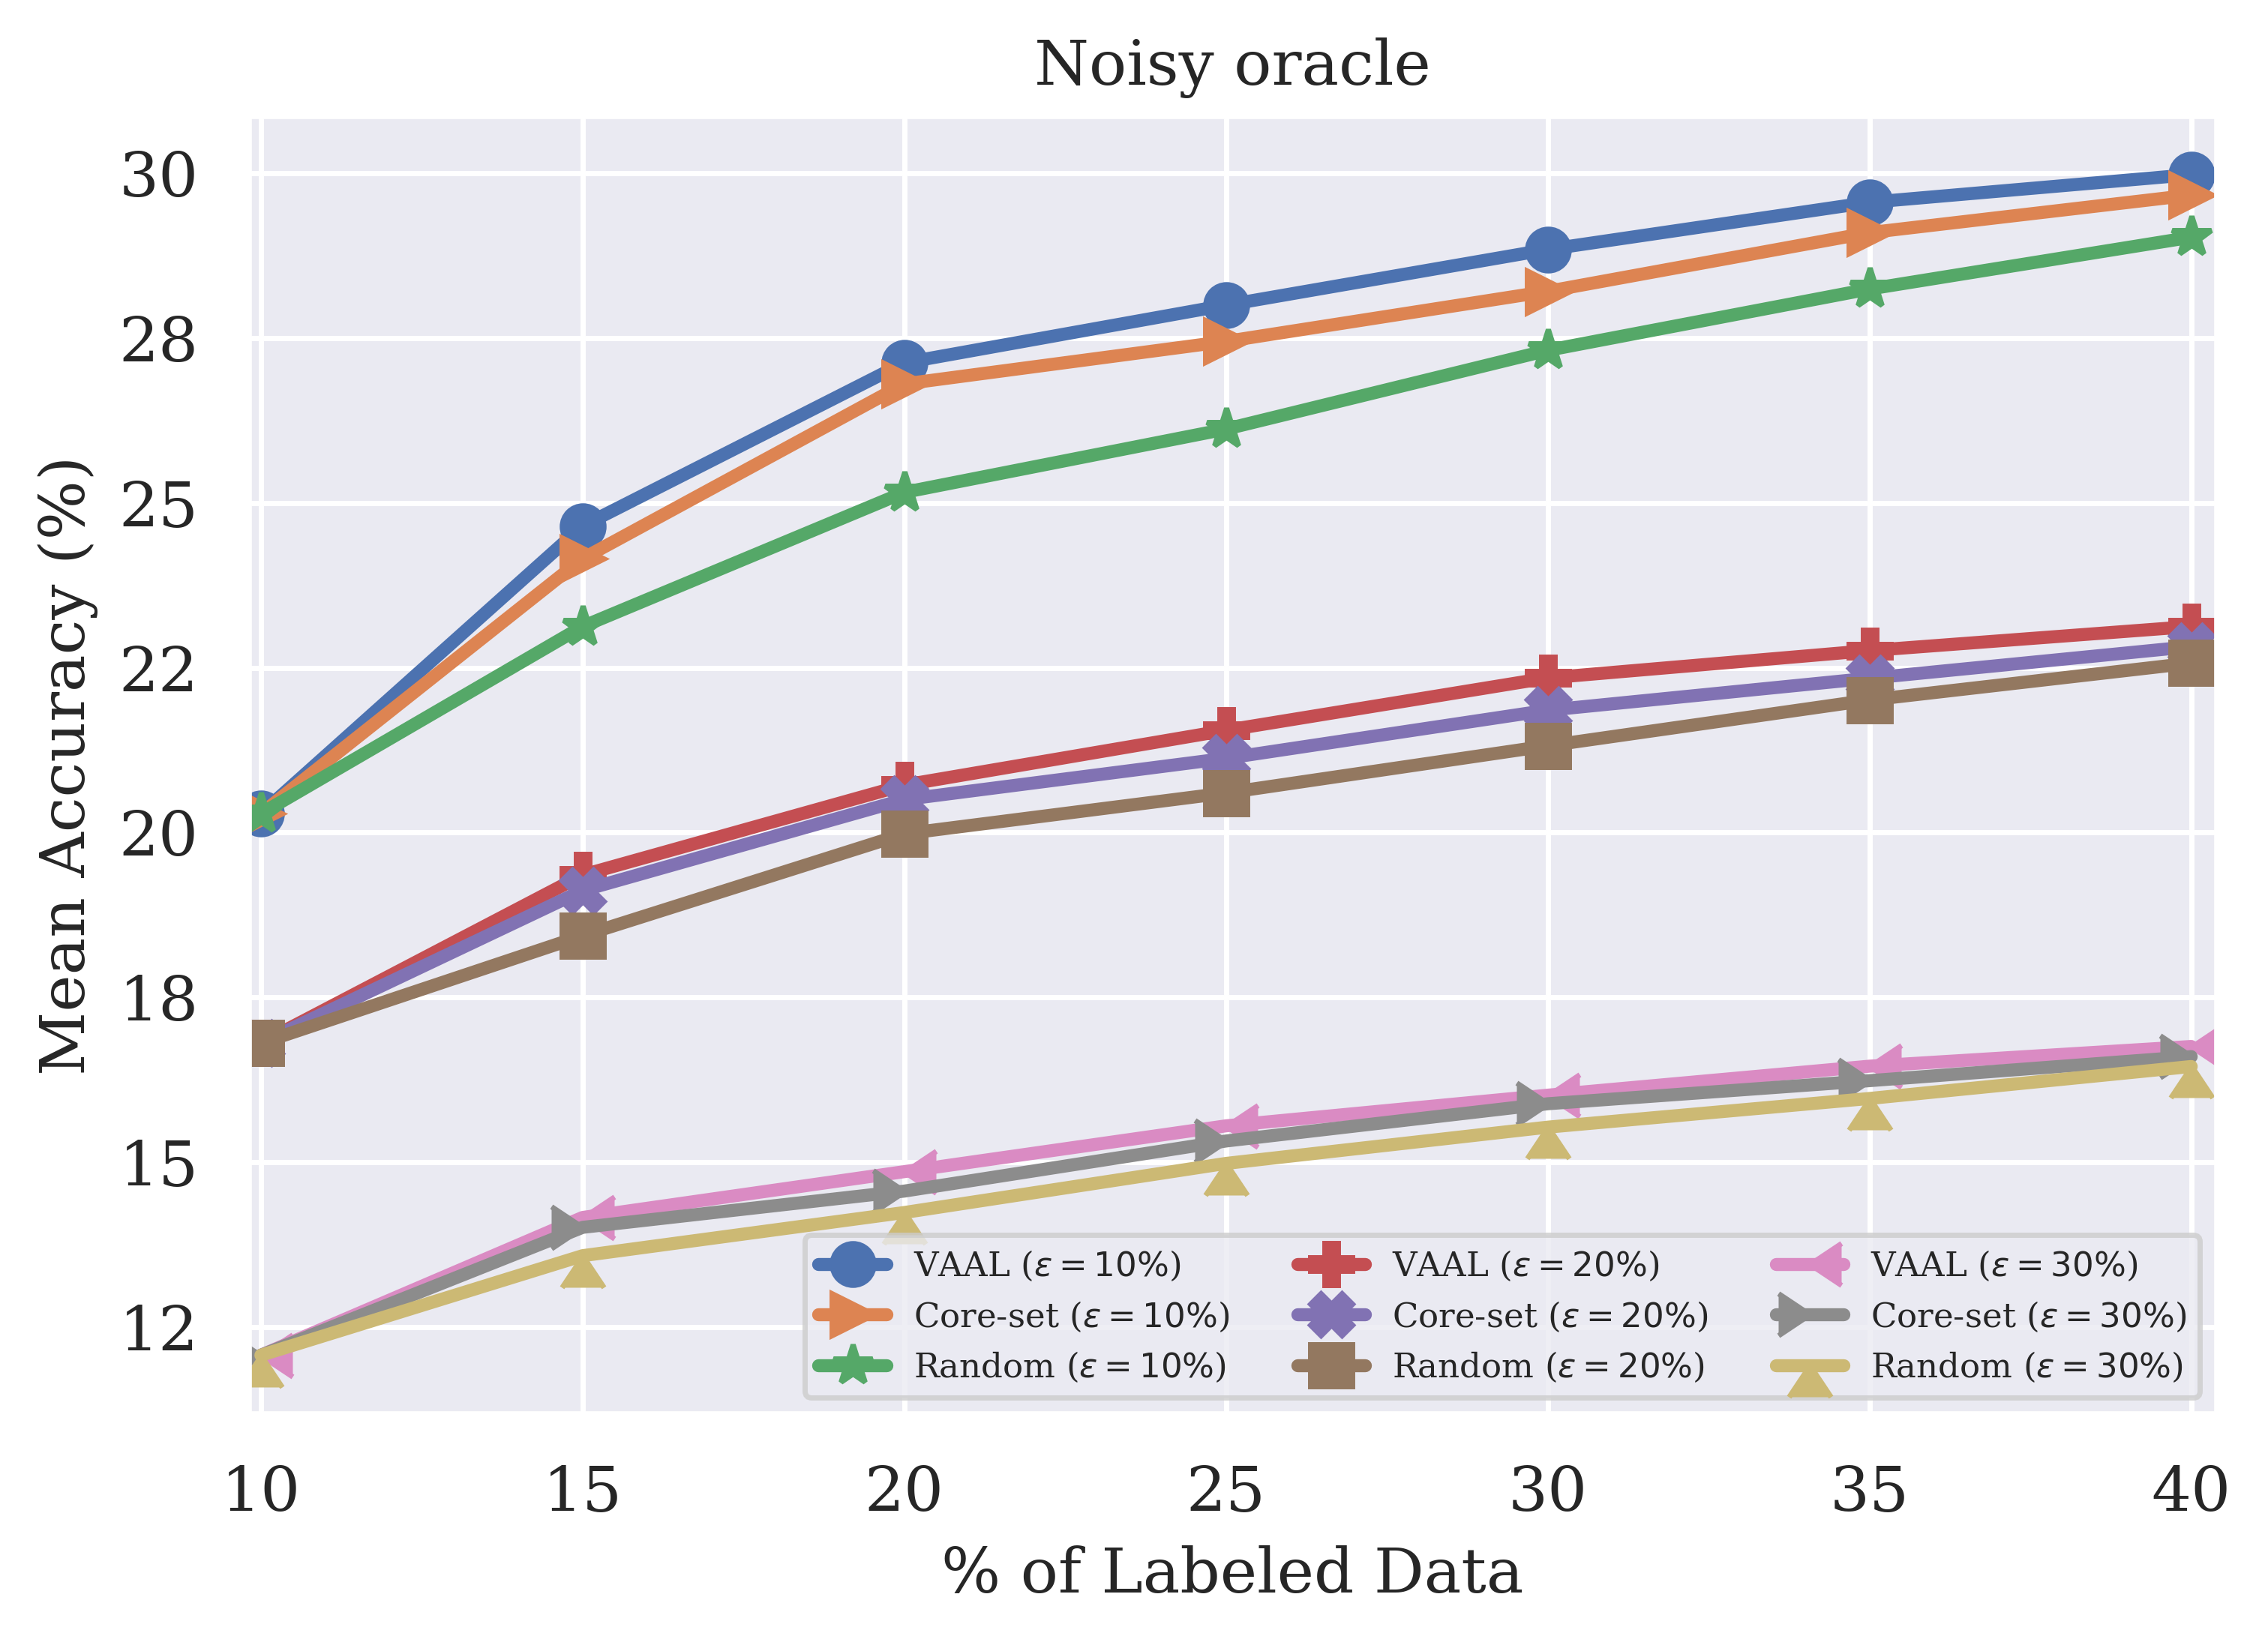

In [14]:
cifar100_ratios=[100.*item for item in [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]]
cifar100_random_noise_ten_rand = [20.285, 23.125, 25.16, 26.12, 27.315, 28.245, 29.03]
cifar100_random_noise_ten_core = [20.285, 24.155, 26.805, 27.45, 28.21, 29.1, 29.67]
cifar100_random_noise_ten_our = [20.285, 24.65, 27.125, 28.0, 28.845, 29.56, 29.98]

cifar100_random_noise_twenty_rand = [16.805, 18.435, 19.98, 20.6, 21.315, 22.01, 22.57]
cifar100_random_noise_twenty_core = [16.805, 19.12, 20.5, 21.125, 21.855, 22.34, 22.82]
cifar100_random_noise_twenty_our = [16.805, 19.355, 20.72, 21.55, 22.345, 22.76, 23.125]

cifar100_random_noise_thirty_rand = [12.07, 13.58, 14.235, 14.98, 15.53, 15.965, 16.45]
cifar100_random_noise_thirty_core = [12.07, 14.01, 14.56, 15.32, 15.885, 16.235, 16.6]
cifar100_random_noise_thirty_our = [12.07, 14.16, 14.855, 15.55, 16.015, 16.455, 16.754]

fig, ax = plt.subplots(dpi=500)
plt_props()

cifar100_random_noise_ten_our_plot = plt.errorbar(cifar100_ratios, cifar100_random_noise_ten_our, marker=m['VAAL'], label='VAAL ($\epsilon=10\%$)')
cifar100_random_noise_ten_core_plot = plt.errorbar(cifar100_ratios, cifar100_random_noise_ten_core, marker=m['Core-set'], label='Core-set ($\epsilon=10\%$)')
cifar100_random_noise_ten_rand_plot = plt.errorbar(cifar100_ratios, cifar100_random_noise_ten_rand, marker=m['Random'], label='Random ($\epsilon=10\%$)')
cifar100_random_noise_twenty_our_plot = plt.errorbar(cifar100_ratios, cifar100_random_noise_twenty_our, marker='P', label='VAAL ($\epsilon=20\%$)')
cifar100_random_noise_twenty_core_plot = plt.errorbar(cifar100_ratios, cifar100_random_noise_twenty_core, marker='X', label='Core-set ($\epsilon=20\%$)')
cifar100_random_noise_twenty_rand_plot = plt.errorbar(cifar100_ratios, cifar100_random_noise_twenty_rand, marker='s', label='Random ($\epsilon=20\%$)')
cifar100_random_noise_thirty_our_plot = plt.errorbar(cifar100_ratios, cifar100_random_noise_thirty_our, marker=4, label='VAAL ($\epsilon=30\%$)')
cifar100_random_noise_thirty_core_plot = plt.errorbar(cifar100_ratios, cifar100_random_noise_thirty_core, marker=5, label='Core-set ($\epsilon=30\%$)')
cifar100_random_noise_thirty_rand_plot = plt.errorbar(cifar100_ratios, cifar100_random_noise_thirty_rand, marker=6, label='Random ($\epsilon=30\%$)')

ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.legend(handles=[cifar100_random_noise_ten_our_plot, cifar100_random_noise_ten_core_plot, cifar100_random_noise_ten_rand_plot,
                    cifar100_random_noise_twenty_our_plot, cifar100_random_noise_twenty_core_plot, cifar100_random_noise_twenty_rand_plot,
                    cifar100_random_noise_thirty_our_plot, cifar100_random_noise_thirty_core_plot, cifar100_random_noise_thirty_rand_plot])
ax.set_xlim(9.8, 40.4)
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.9,
                 box.width, box.height * 0.01])

plt.rcParams['legend.fontsize'] = 6.5
plt.legend(ncol=3, loc='lower right')
fig.tight_layout()

plt.xlabel('% of Labeled Data')
plt.ylabel('Mean Accuracy (%)')  
plt.title('Noisy oracle')
plt.grid(True)
plt.show()

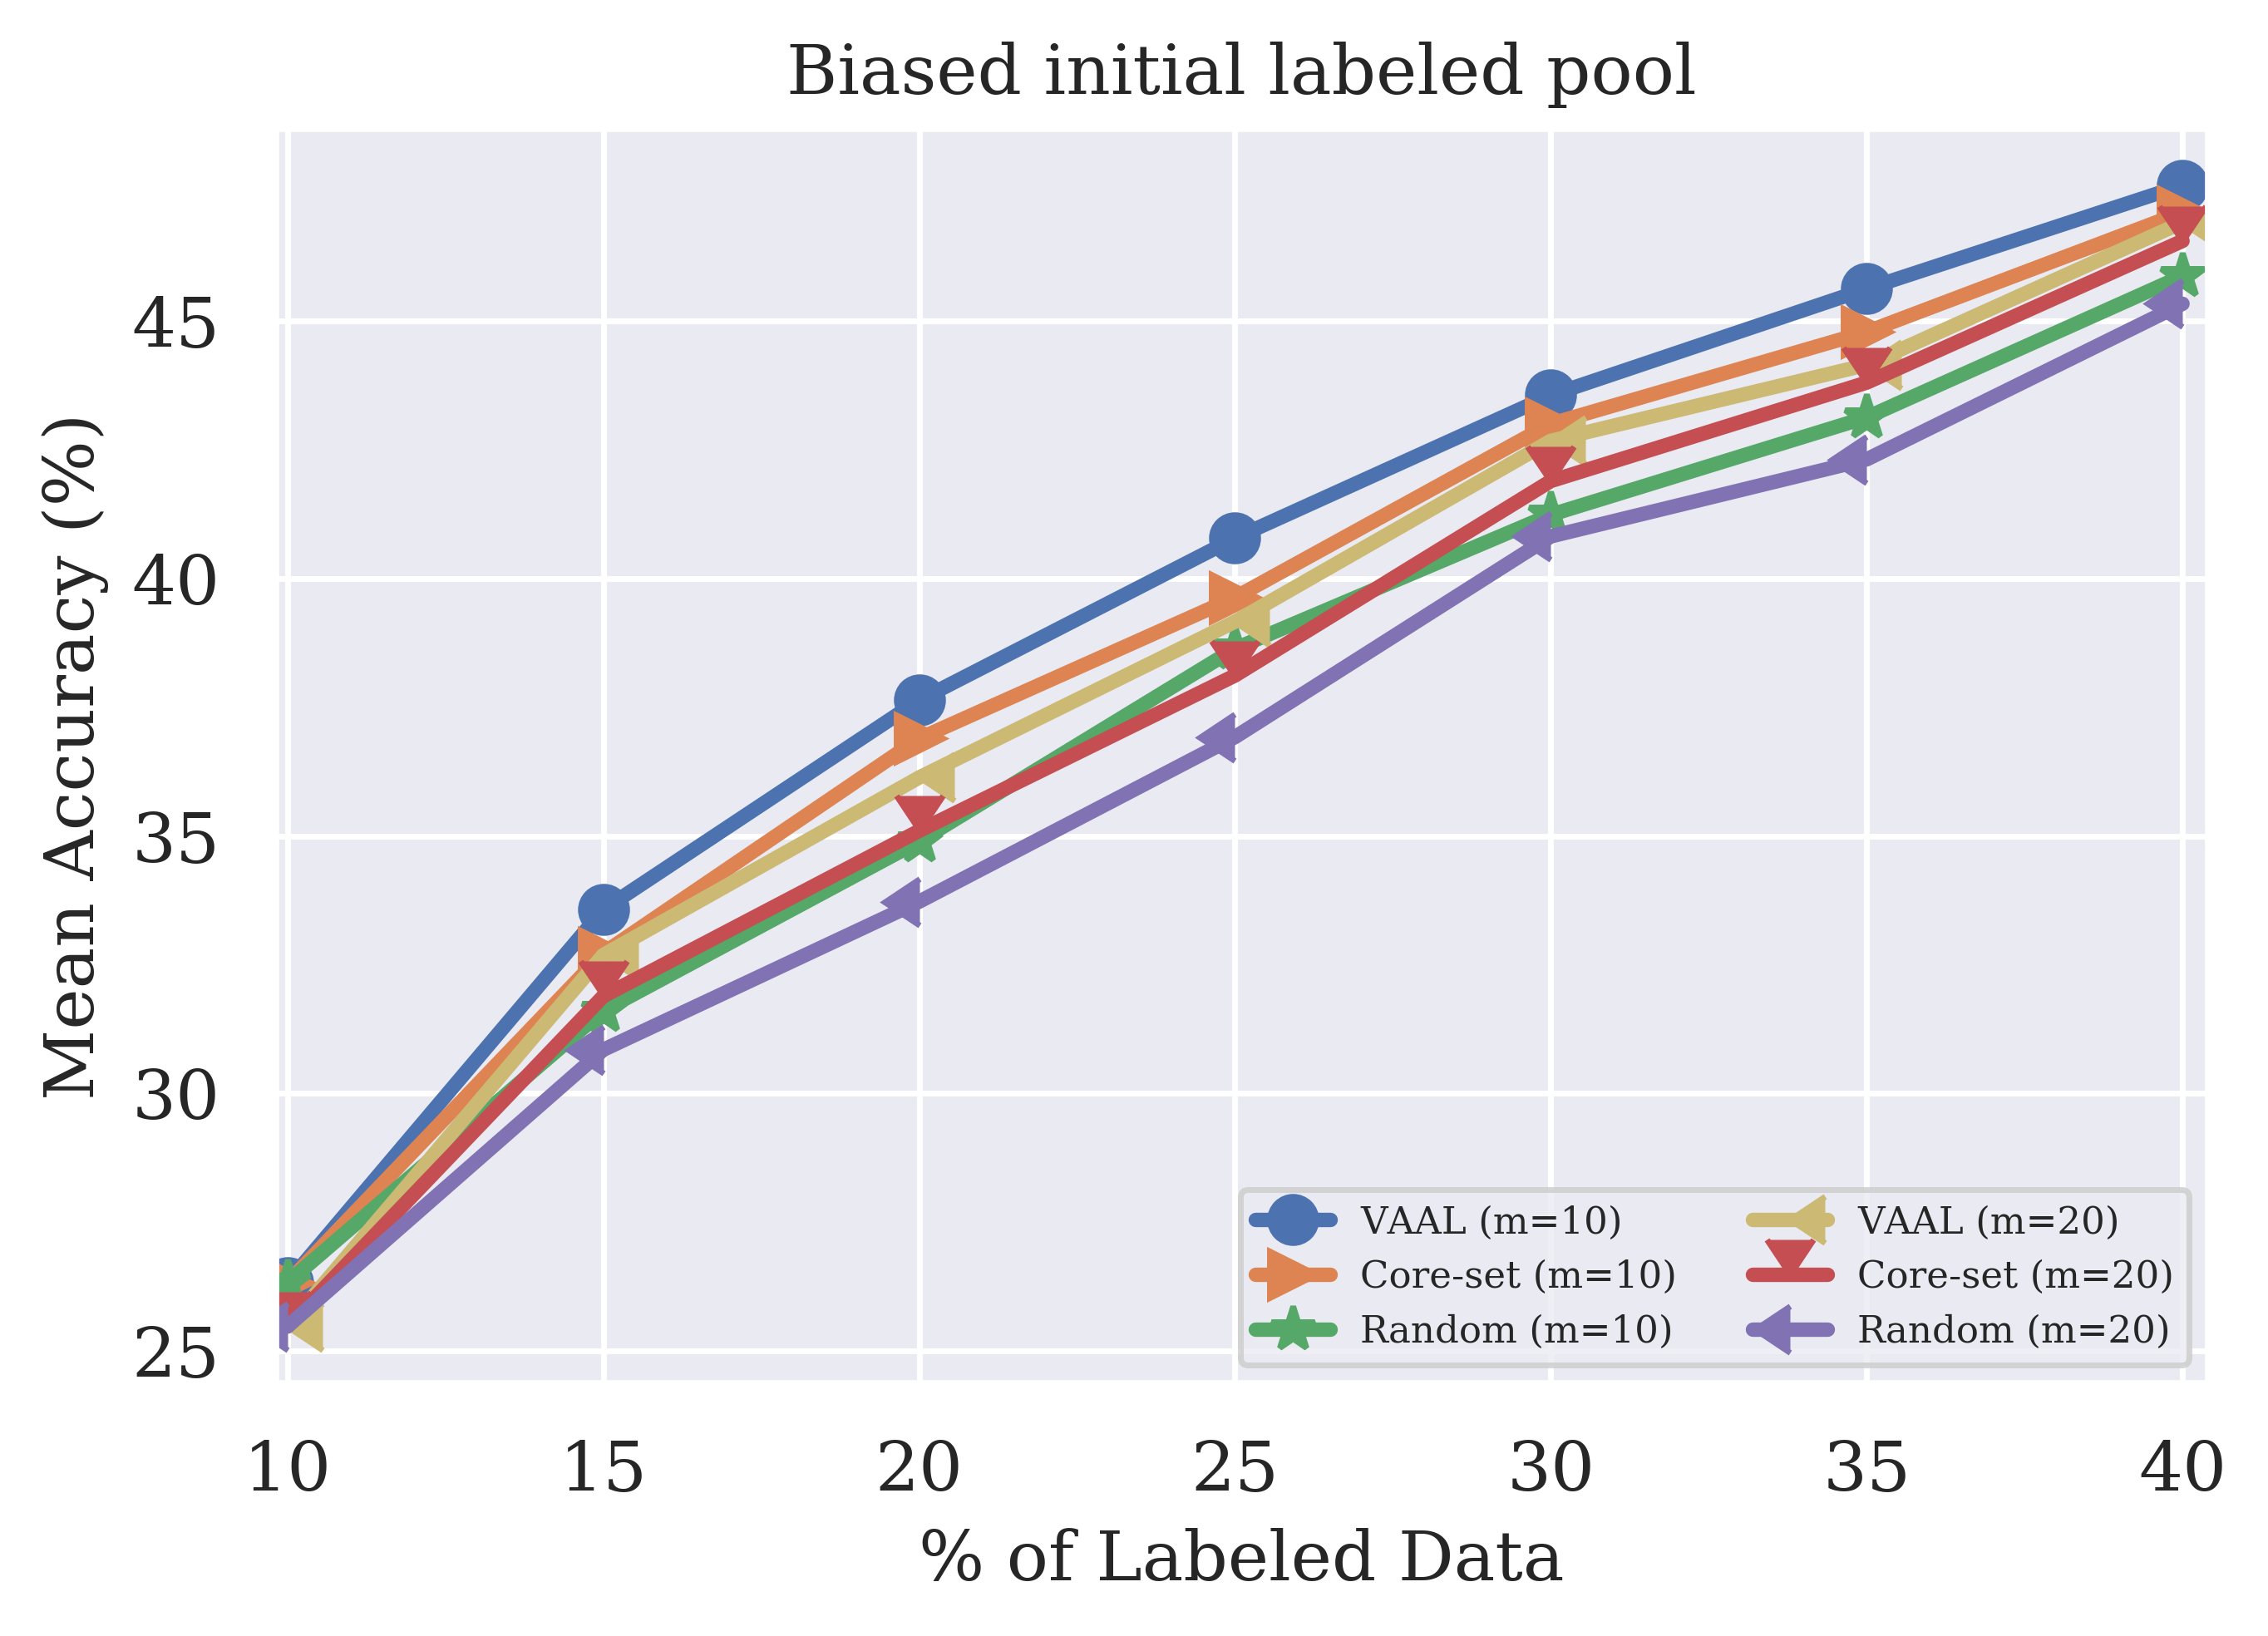

In [15]:
cifar100_ratios=[100.*item for item in [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]]

cifar100_coreset_10 = [26.33, 32.725, 36.89, 39.63, 43.0, 44.785, 47.105]
cifar100_random_10 = [26.33, 31.61, 34.895, 38.635, 41.235, 43.125, 45.87]
cifar100_our_10 = [26.33, 33.57, 37.635, 40.78, 43.555, 45.62, 47.63]

cifar100_coreset_20 = [25.48, 31.89, 35.1, 38.115, 41.89, 43.8, 46.55]
cifar100_random_20 = [25.48, 30.85, 33.725, 36.92, 40.815, 42.31, 45.33]
cifar100_our_20 = [25.48, 32.69, 36.135, 39.16, 42.67, 44.145, 46.91]

fig, ax = plt.subplots(dpi=500)
cifar100_our_method_plot_10 = plt.errorbar(cifar100_ratios, cifar100_our_10, marker=m['VAAL'], label='VAAL (m=10)')
cifar100_coreset_plot_10 = plt.errorbar(cifar100_ratios, cifar100_coreset_10, marker=m['Core-set'], label='Core-set (m=10)')
cifar100_random_plot_10 = plt.errorbar(cifar100_ratios, cifar100_random_10, marker=m['Random'], label='Random (m=10)')
cifar100_our_method_plot_20 = plt.errorbar(cifar100_ratios, cifar100_our_20, marker=4, label='VAAL (m=20)', color='y')
cifar100_coreset_plot_20 = plt.errorbar(cifar100_ratios, cifar100_coreset_20, marker=7, label='Core-set (m=20)')
cifar100_random_plot_20 = plt.errorbar(cifar100_ratios, cifar100_random_20, marker=8, label='Random (m=20)')

plt.legend(handles=[cifar100_our_method_plot_10, cifar100_coreset_plot_10, cifar100_random_plot_10,
                    cifar100_our_method_plot_20, cifar100_coreset_plot_20, cifar100_random_plot_20,
                    cifar100_random_plot_20])
ax.set_xlim(9.8, 40.4)

plt.legend(ncol=2, loc='lower right')
plt.xlabel('% of Labeled Data')
plt.ylabel('Mean Accuracy (%)')  
plt.title('Biased initial labeled pool')
plt.grid(True)
plt.show()

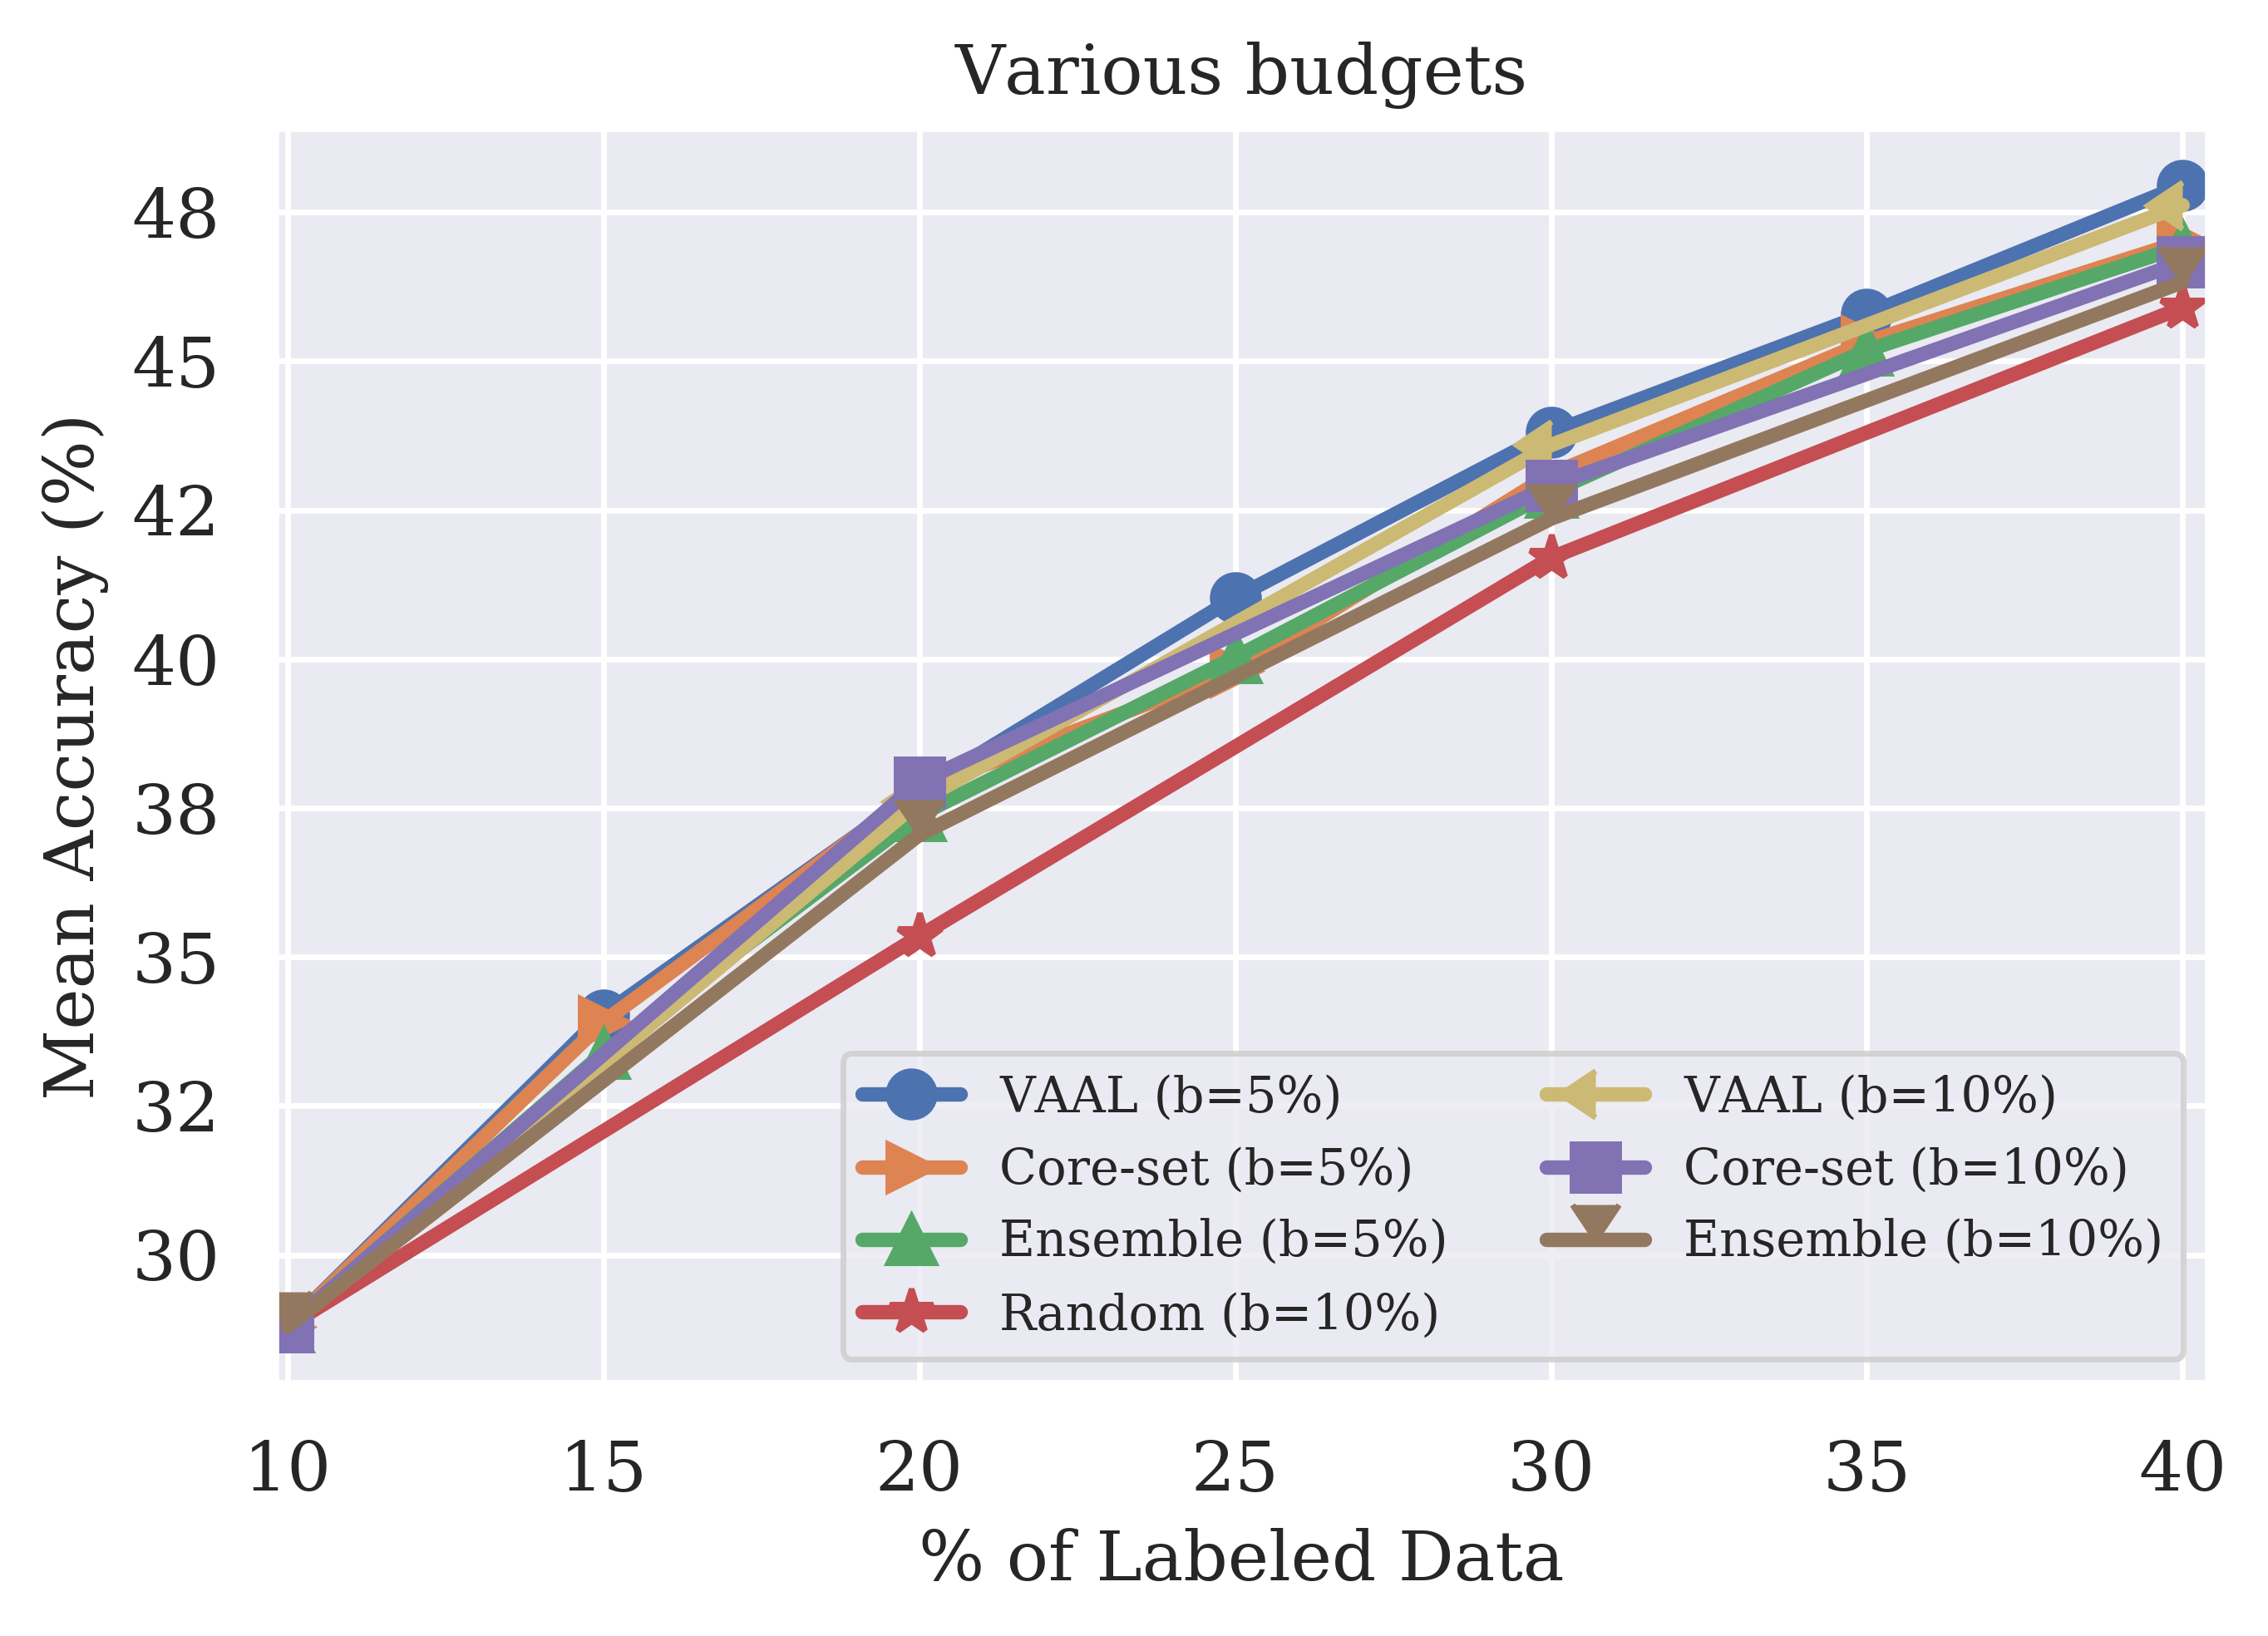

In [16]:
cifar100_ratios=[100.*item for item in [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]]
cifar100_coreset = [28.8, 33.91, 37.81, 39.8, 43.1, 45.32, 47.01]
cifar100_our_method = [28.8, 34.03, 37.79, 41.03, 43.8, 45.79, 47.95]
cifar100_ensemble = [28.8, 33.39, 37.38, 40.03, 42.8, 45.18, 46.93]
cifar100_dropout = [28.8, 32.8, 35.58, 37.89, 40.8, 43.04, 44.3]
cifar100_random = [28.8, 35.35, 41.7, 45.9]
cifar100_empirical = [28.8, 32.0, 35.15, 38.835, 40.8, 43.1, 45.7]

cifar100_ratios_10 = [100.*item for item in [0.1, 0.2, 0.3, 0.4]]
cifar100_coreset_10 = [28.8, 37.935, 42.91, 46.66]
cifar100_our_method_10 = [28.8, 37.61, 43.59, 47.615]
cifar100_ensemble_10 = [28.8, 37.05, 42.355, 46.325]
cifar100_dropout_10 = [28.8, 35.035, 40.09, 44.775]
cifar100_empirical_10 = [28.8, 34.89, 40.565, 45.875]

fig, ax = plt.subplots(dpi=500)
cifar100_our_method_plot = plt.errorbar(cifar100_ratios, cifar100_our_method, marker=m['VAAL'], label='VAAL (b=5%)')
cifar100_coreset_plot = plt.errorbar(cifar100_ratios, cifar100_coreset, label='Core-set (b=5%)', marker=m['Core-set'])
cifar100_ensemble_plot = plt.errorbar(cifar100_ratios, cifar100_ensemble, label='Ensemble (b=5%)', marker=m['Ensemble'])
cifar100_random_plot = plt.errorbar(cifar100_ratios_10, cifar100_random, label='Random (b=10%)', marker=m['Random'])
cifar100_our_method_plot_10 = plt.errorbar(cifar100_ratios_10, cifar100_our_method_10,  marker=8, label='VAAL (b=10%)', color='y')
cifar100_coreset_plot_10 = plt.errorbar(cifar100_ratios_10, cifar100_coreset_10,  marker='s', label='Core-set (b=10%)')
cifar100_ensemble_plot_10 = plt.errorbar(cifar100_ratios_10, cifar100_ensemble_10,  marker=7, label='Ensemble (b=10%)')

plt_props()
plt.rcParams['legend.fontsize'] = 8.5

ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

plt.legend(handles=[cifar100_our_method_plot, cifar100_coreset_plot, cifar100_ensemble_plot,
                    cifar100_random_plot, 
                    cifar100_our_method_plot_10, cifar100_coreset_plot_10, cifar100_ensemble_plot_10])
ax.set_xlim(9.8, 40.4)
plt.legend(ncol=2, loc='lower right')
plt.xlabel('% of Labeled Data')
plt.ylabel('Mean Accuracy (%)')  
plt.title('Various budgets')
plt.grid(True)
plt.show()

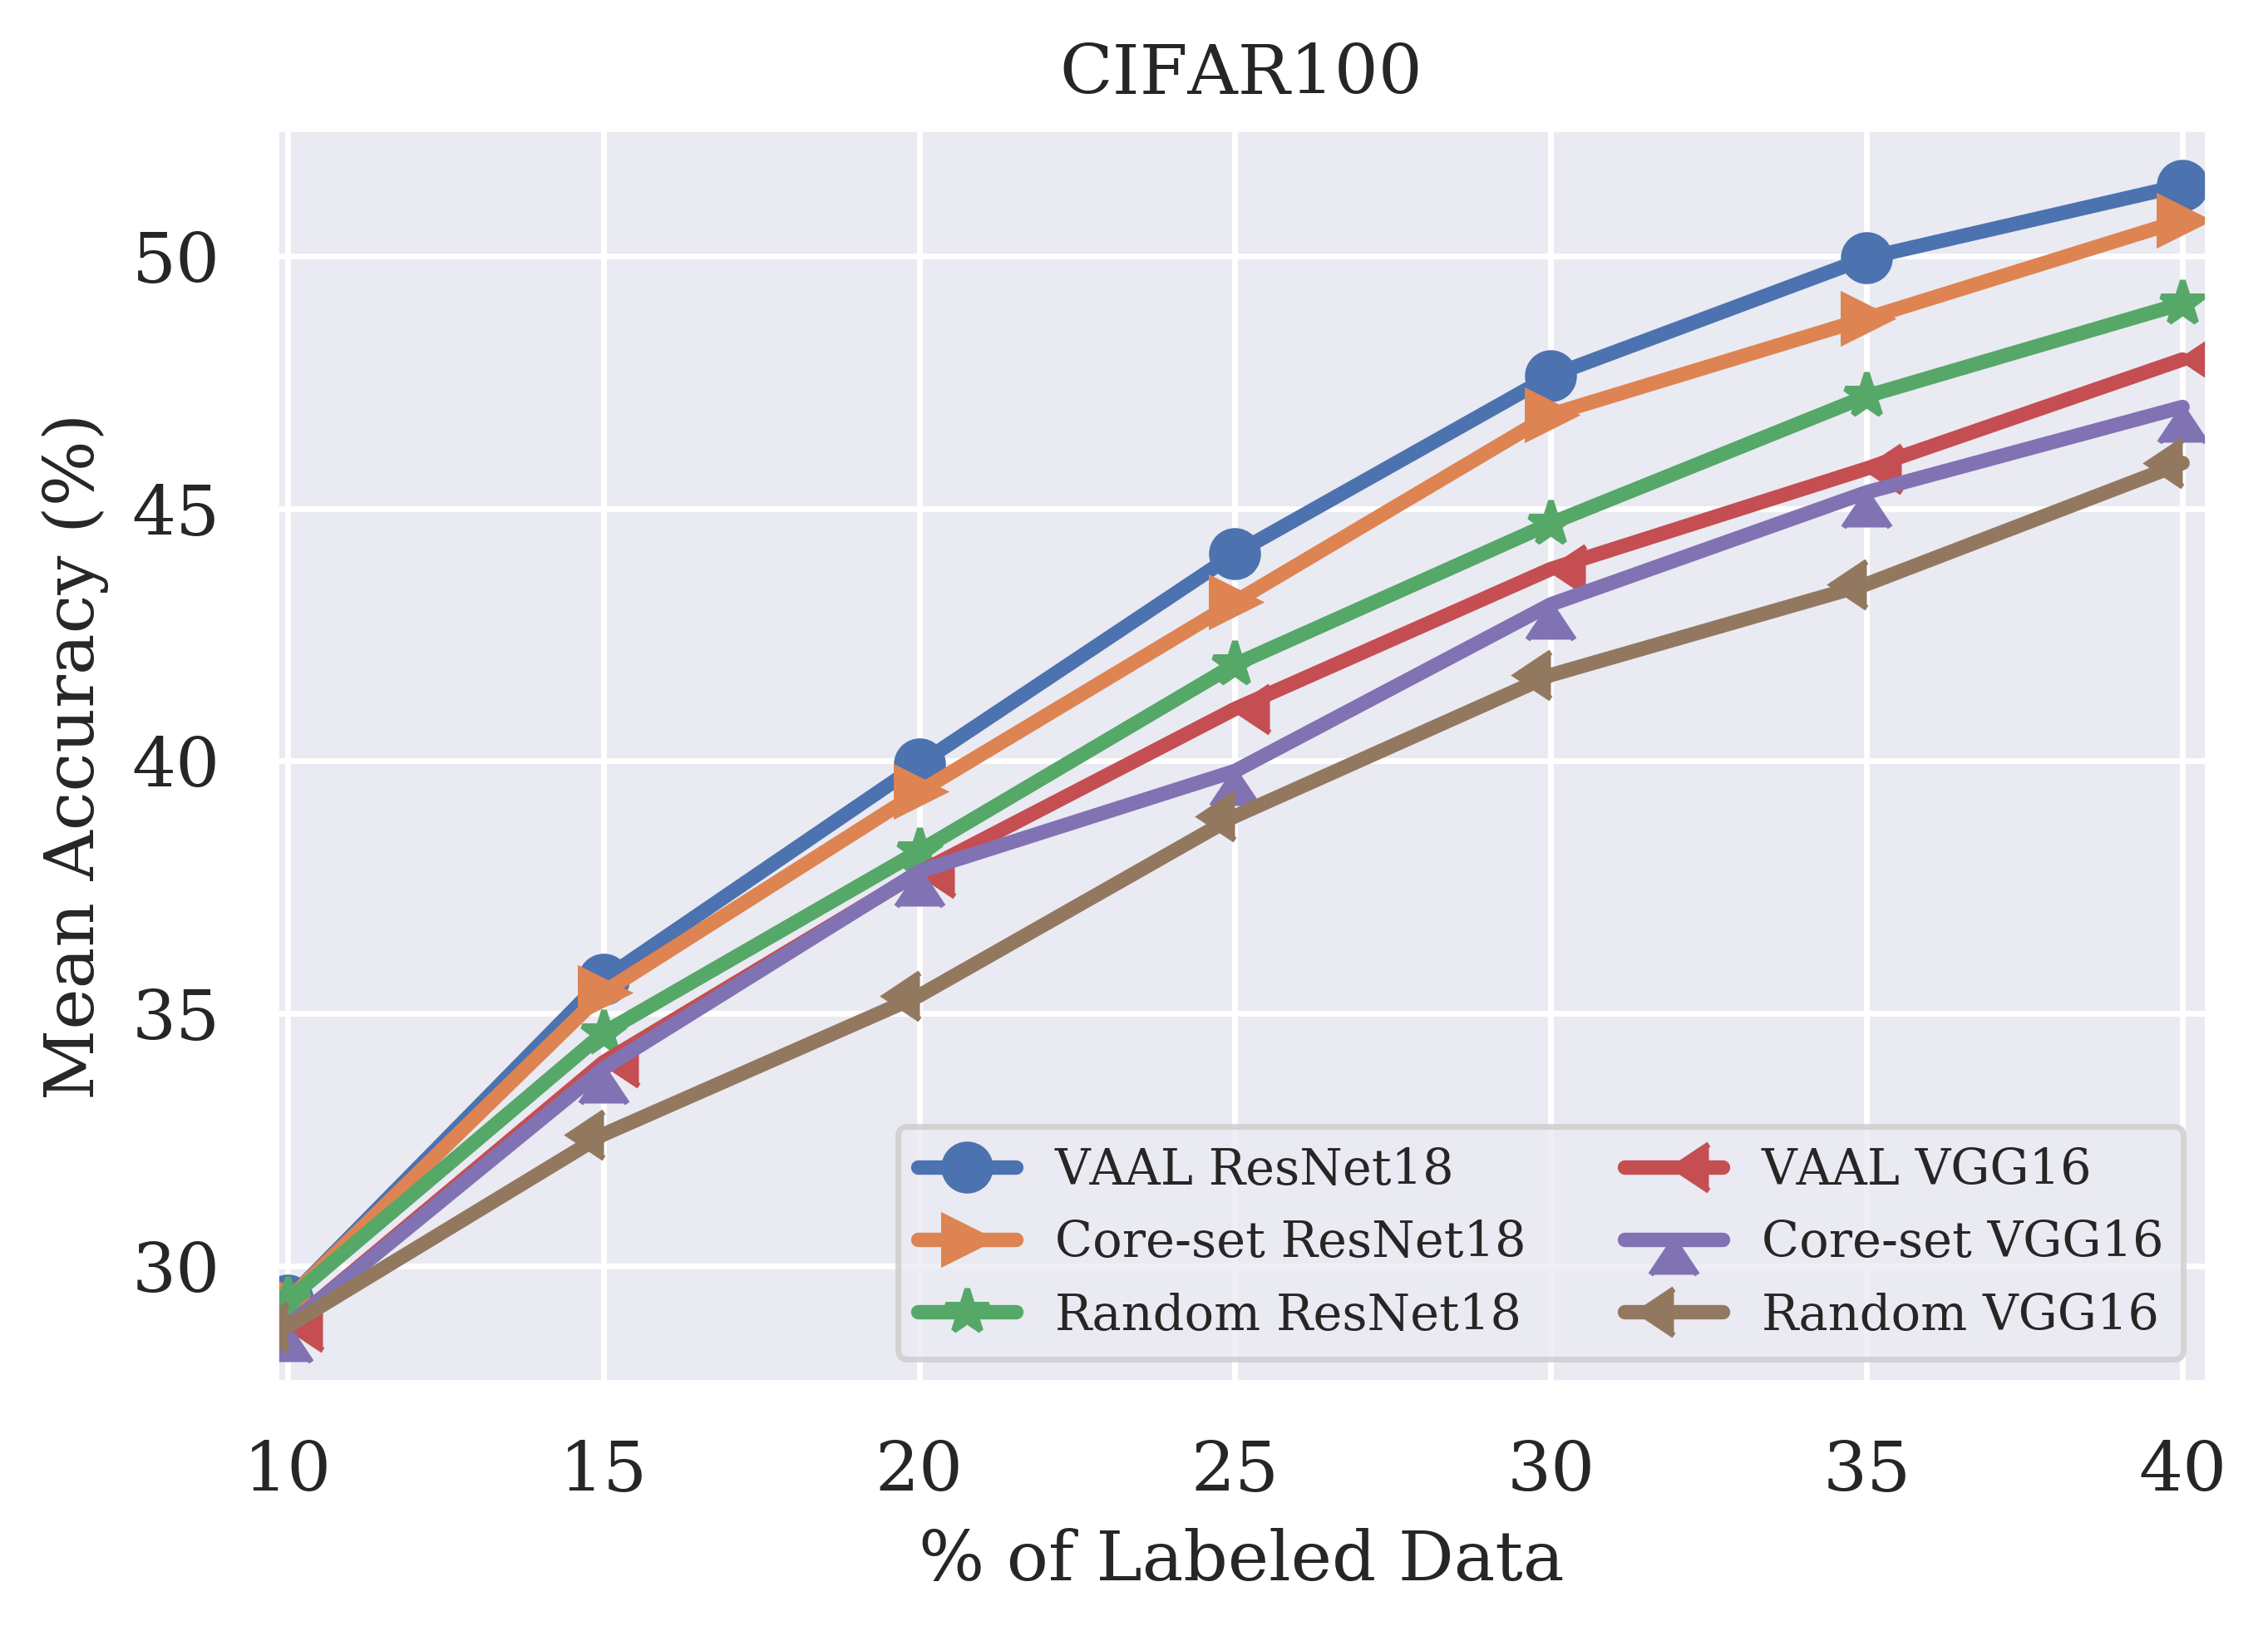

In [17]:
cifar100_ratios=[100.*item for item in [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]]

cifar100_coreset_res = [29.315, 35.415, 39.39, 43.15, 46.86, 48.765, 50.71]
cifar100_our_res = [29.315, 35.67, 39.935, 44.105, 47.625, 49.96, 51.4]
cifar100_random_res = [29.315, 34.61, 38.215, 41.91, 44.705, 47.225, 49.06]
cifar100_coreset_vgg = [28.8, 33.91, 37.81, 39.8, 43.1, 45.32, 47.01]
cifar100_our_vgg = [28.8, 34.03, 37.79, 41.03, 43.8, 45.79, 47.95]
cifar100_random_vgg = [28.8, 32.6, 35.35, 38.905, 41.7, 43.5, 45.9]


fig, ax = plt.subplots(dpi=500)
cifar100_our_method_plot = plt.errorbar(cifar100_ratios, cifar100_our_res, label='VAAL ResNet18', marker=m['VAAL'])
cifar100_coreset_plot = plt.errorbar(cifar100_ratios, cifar100_coreset_res, label='Core-set ResNet18', marker=m['Core-set'])
cifar100_random_plot = plt.errorbar(cifar100_ratios, cifar100_random_res, label='Random ResNet18', marker=m['Random'])
cifar100_our_method_plot_vgg = plt.errorbar(cifar100_ratios, cifar100_our_vgg, label='VAAL VGG16', marker=4)
cifar100_coreset_plot_vgg = plt.errorbar(cifar100_ratios, cifar100_coreset_vgg, label='Core-set VGG16', marker=6)
cifar100_random_plot_vgg = plt.errorbar(cifar100_ratios, cifar100_random_vgg, label='Random VGG16', marker=8)

plt.legend(handles=[cifar100_our_method_plot, cifar100_coreset_plot, cifar100_random_plot,
                    cifar100_our_method_plot_vgg, cifar100_coreset_plot_vgg, cifar100_random_plot_vgg])
ax.set_xlim(9.8, 40.4)
plt.legend(ncol=2, loc='lower right')
plt.xlabel('% of Labeled Data')
plt.ylabel('Mean Accuracy (%)')  
plt.title('CIFAR100')
plt.grid(True)
plt.show()